# Data Mining / Prospecção de Dados

## Sara C. Madeira, 2024/2025

# Project 1 - Pattern Mining

## Logistics 
**_Read Carefully_**

**Students should work in teams of 3 people**. 

Groups with less than 3 people might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `May, 4th (23:59)`.** 

Students should **upload a `.zip` file** containing a folder with all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the `zip` file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202425_P1.ipynb` as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs.**

**Decisions should be justified and results should be critically discussed.** 

Remember that **your notebook should be as clear and organized as possible**, that is, **only the relevant code and experiments should be presented, not everything you tried and did not work, or is not relevant** (that can be discussed in the text, if relevant)! Tables and figures can be used together with text to summarize results and conclusions, improving understanding, readability and concision. **More does not mean better! The target is quality not quantity!**

_**Project solutions containing only code and outputs without discussions will achieve a maximum grade of 10 out of 20.**_

## Dataset and Tools

The dataset to be analysed is **`Foodmart_2025_DM.csv`**, which is a modified and integrated version of the **Foodmart database**, used in several [Kaggle](https://www.kaggle.com) Pattern Mining competitions, with the goal of finding **actionable patterns** by analysing data from the `FOODmart Ltd` company, a leading supermarket chain. 

`FOODmart Ltd` has different types of stores: Deluxe Supermarkets, Gourmet Supermarkets, Mid-Size Grocerys, Small Grocerys and 
Supermarkets. Y

Your **goals** are to find: 
1. **global patterns** (common to all stores) and
2. **local/specific patterns** (related to the type of store).

**`Foodmart_2025_DM.csv`** stores **69549 transactions** from **24 stores**, where **103 different products** can be bought. 

Each transaction (row) has a `STORE_ID` (integer from 1 to 24), and a list of produts (items), together with the quantities bought. 

In the transation highlighted below, a given customer bought 1 unit of soup, 2 of cheese and 1 of wine at store 2.

<img src="Foodmart_2025_DM_Example.png" alt="Foodmart_2025_DM_Example" style="width: 1000px;"/>

In this context, the project has **2 main tasks**:
1. Mining Frequent Itemsets and Association Rules: Ignoring Product Quantities and Stores **(global patterns)**
2. Mining Frequent Itemsets and Association Rules: Looking for Differences between Stores **(local/specific patterns)**

**While doing PATTERN and ASSOCIATION MINING keep in mind the following basic/key questions and BE CREATIVE!**

1. What are the most popular products?
2. Which products are bought together?
3. What are the frequent patterns?
4. Can we find associations highlighting that when people buy a product/set of products also buy other product(s)?
5. Are these associations strong? Can we trust them? Are they misleading?
6. Can we analyse these patterns and evaluate these associations to find, not only frequent and strong associations, but also interest patterns and associations?

**In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and [`MLxtend`](http://rasbt.github.io/mlxtend/).**

When using `MLxtend`, frequent patterns can either be discovered using `Apriori` and `FP-Growth`. **Choose the pattern mining algorithm to be used.** 

## Team Identification

**GROUP 16**

Students:

* Manuel Deus - 58147
* António Estêvão - 58203
* Diogo Venes - 58216

## 0. Importing necessary libraries

In [18]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax
import matplotlib.pyplot as plt
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
from IPython.display import display

## 1. Mining Frequent Itemsets and Association Rules: Ignoring Product Quantities and Stores

In this first task you should load and preprocessed the dataset **`Foodmart_2025_DM.csv`** in order to compute frequent itemsets and generate association rules considering all the transactions, regardeless of the store, and ignoring product quantities.

### 1.1. Load and Preprocess Dataset

 **Product quantities and stores should not be considered.**

In [19]:
#def load_transactions_ignore_quantities_and_stores(csv):
#    transactions_matrix = []
#    with open(csv, 'r') as f:
#        for line in f:
#            items = line.strip().split(',')
#            transaction = []
#            for item in items:
#                key_value = item.split('=')
#                if key_value[0] != "STORE_ID" and key_value[0].strip() != "":
#                    transaction.append(key_value[0])
#            transactions_matrix.append(transaction)
#    return transactions_matrix
def load_transactions_ignore_quantities_and_stores(csv):
    lines = open(csv, 'r').readlines()
    transactions_matrix = []
    for l in lines:
        items = l.rstrip('\n').split(',')
        transaction = []
        for item in items:
            product = item.split('=')
            if product[0] != "STORE_ID" and product[0].strip() != "":
                transaction.append(product[0])
        transactions_matrix.append(transaction)
    return transactions_matrix


transactions = load_transactions_ignore_quantities_and_stores('Foodmart_2025_DM.csv')

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Acetominifen,Anchovies,Aspirin,Auto Magazines,Bagels,Batteries,Beer,Bologna,Candles,Canned Fruit,Canned Vegetables,Cereal,Cheese,Chips,Chocolate,Chocolate Candy,Clams,Cleaners,Coffee,Cold Remedies,Computer Magazines,Conditioner,Cookies,Cooking Oil,Cottage Cheese,Crackers,Deli Meats,Deli Salads,Deodorizers,Dips,Donuts,Dried Fruit,Dried Meat,Eggs,Fashion Magazines,Flavored Drinks,French Fries,Fresh Chicken,Fresh Fish,Fresh Fruit,Fresh Vegetables,Frozen Chicken,Frozen Vegetables,Gum,Hamburger,Hard Candy,Home Magazines,Hot Dogs,Ibuprofen,Ice Cream,Jam,Jelly,Juice,Lightbulbs,Maps,Milk,Mouthwash,Muffins,Nasal Sprays,Nuts,Oysters,Pancake Mix,Pancakes,Paper Dishes,Paper Wipes,Pasta,Peanut Butter,Personal Hygiene,Pizza,Plastic Utensils,Popcorn,Popsicles,Pot Cleaners,Pot Scrubbers,Pots and Pans,Preserves,Pretzels,Rice,Sardines,Sauces,Screwdrivers,Shampoo,Shellfish,Shrimp,Sliced Bread,Soda,Soup,Sour Cream,Spices,Sponges,Sports Magazines,Sugar,Sunglasses,TV Dinner,Tofu,Toilet Brushes,Tools,Toothbrushes,Tuna,Waffles,Wine,Yogurt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Fal

For data loading and preprocessing, we took an approach similar to the one in the TP lessons, going line by line and then item by item by splitting through commas. As we don't want to consider product quantities and stores in this first part, we ignore the item if its "STORE_ID" and only append the first element of the array to the transaction, which corresponds to appending the product name and leaving out the quantity bought. At first we were getting a dataframe that had a nameless column as its first column, so we had to ignore the key_values that were the empty character. In regards to some lines, after consulting with the teacher we decided to keep the lines that didn't begin with "STORE_ID", as for the first part we aren't taking that into account, so we consider them badly formatted but still useful for this section.

### 1.2. Compute Frequent Itemsets

* Compute frequent itemsets considering a minimum support S_min. 
* Present frequent itemsets organized by length (number of items). 
* List frequent 1-itemsets, 2-itemsets, 3-itemsets, etc with support of at least S < S_min.
* Change the minimum support values and discuss the results.

First, let's analyze which algorithm is faster, and therefore the one we should pick. To do this, we've selected a few support values to test out. These values are all relatively low as this is a large dataset so we will need a support value on the lower end to obtain some meaningful results.

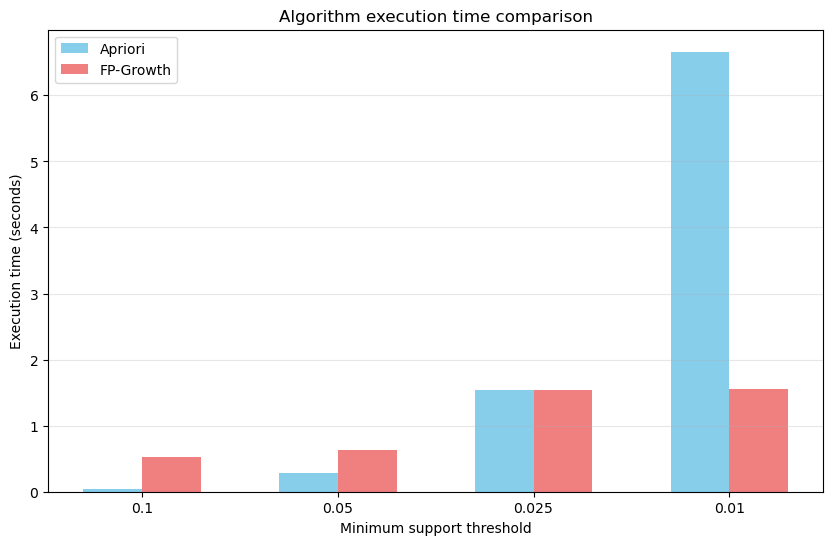

In [20]:
import time

min_supp_values = [0.1, 0.05, 0.025, 0.01]
apriori_times = []
fpgrowth_times = []

for S_min in min_supp_values:
    start_time = time.time()
    apriori_itemsets = apriori(df, min_support=S_min, use_colnames=True)
    apriori_time = time.time() - start_time
    apriori_times.append(apriori_time)
    
    start_time = time.time()
    fpgrowth_itemsets = fpgrowth(df, min_support=S_min, use_colnames=True)
    fpgrowth_time = time.time() - start_time
    fpgrowth_times.append(fpgrowth_time)


plt.figure(figsize=(10, 6))
x = np.arange(len(min_supp_values))
width = 0.30

apriori_bars = plt.bar(x - width/2, apriori_times, width, label='Apriori', color='skyblue')
fpgrowth_bars = plt.bar(x + width/2, fpgrowth_times, width, label='FP-Growth', color='lightcoral')

plt.xlabel('Minimum support threshold')
plt.ylabel('Execution time (seconds)')
plt.title('Algorithm execution time comparison')
plt.xticks(x, [str(s) for s in min_supp_values])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Analyzing the above results, we can see that, as expected, Apriori performs better than FP-Growth when we have less itemsets, in other words when we have a higher minimum support. The difference becomes really apparent when we set the minimum support to 0.01, where Apriori takes over double the time of FP-Growth. Let's use FP-Growth from now on as we expect to be working with lower minimum support thresholds. 

Next, lets choose a value of support to use in the remaining sections, using the support values list we already used when testing the algorithms. 
As a threshold for the association rules, we will use a minimum confidence of 0.3 to balance between rule strength and coverage.
A lower threshold (e.g., 0.1) would generate too many weak and potentially uninteresting rules, while a much higher threshold (e.g., 0.7) would likely miss moderate but actionable associations.
Therefore, a minimum confidence of 0.25 was chosen to allow the discovery of moderately strong, practically meaningful patterns.

In [21]:
# Defining the function to explore support thresholds
def explore_support_thresholds(df_encoded, support_vals, conf_threshold=0.25):
    summary = []
    for s in support_vals:
        itemsets = fpgrowth(df_encoded, min_support=s, use_colnames=True)
        rules = association_rules(itemsets, metric="confidence", min_threshold=conf_threshold)
        summary.append({'support': s, 'n_itemsets': len(itemsets), 'n_rules': len(rules)})
    return pd.DataFrame(summary)

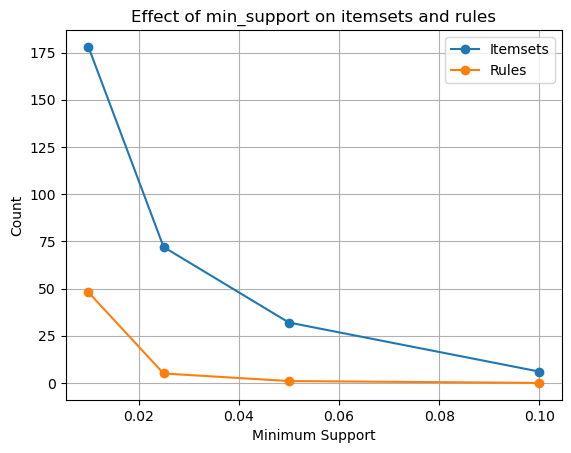

In [22]:
threshold_summary = explore_support_thresholds(df, min_supp_values)

plt.plot(threshold_summary['support'], threshold_summary['n_itemsets'], marker='o', label='Itemsets')
plt.plot(threshold_summary['support'], threshold_summary['n_rules'], marker='o', label='Rules')
plt.xlabel('Minimum Support')
plt.ylabel('Count')
plt.title('Effect of min_support on itemsets and rules')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
threshold_summary

,support,n_itemsets,n_rules
0,0.100,6,0
1,0.050,32,1
2,0.025,72,5
3,0.010,178,48


In [24]:
for S_min in min_supp_values:
    frequent_itemsets = fpgrowth(df, min_support=S_min, use_colnames=True)
        
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    print(f"Frequent itemsets with min support {S_min} :")
    for length in frequent_itemsets['length'].unique():
        print(f"Length {length}:")
        display(frequent_itemsets[frequent_itemsets['length'] == length].sort_values(by='support', ascending=False, ignore_index=True))
        print("\n")

Frequent itemsets with min support 0.1 :
Length 1:


,support,itemsets,length
0,0.284174,(Fresh Vegetables),1
1,0.175229,(Fresh Fruit),1
2,0.120059,(Soup),1
3,0.117802,(Cheese),1
4,0.117212,(Dried Fruit),1
5,0.105408,(Cookies),1




Frequent itemsets with min support 0.05 :
Length 1:


,support,itemsets,length
0,0.284174,(Fresh Vegetables),1
1,0.175229,(Fresh Fruit),1
2,0.120059,(Soup),1
3,0.117802,(Cheese),1
4,0.117212,(Dried Fruit),1
5,0.105408,(Cookies),1
6,0.080677,(Wine),1
7,0.078966,(Paper Wipes),1
8,0.078549,(Canned Vegetables),1
9,0.068340,(Frozen Vegetables),1




Length 2:


,support,itemsets,length
0,0.050914,"(Fresh Fruit, Fresh Vegetables)",2




Frequent itemsets with min support 0.025 :
Length 1:


,support,itemsets,length
0,0.284174,(Fresh Vegetables),1
1,0.175229,(Fresh Fruit),1
2,0.120059,(Soup),1
3,0.117802,(Cheese),1
4,0.117212,(Dried Fruit),1
...,...,...,...
62,0.027132,(Crackers),1
63,0.026715,(Sour Cream),1
64,0.026672,(Aspirin),1
65,0.026586,(Tools),1




Length 2:


,support,itemsets,length
0,0.050914,"(Fresh Fruit, Fresh Vegetables)",2
1,0.035443,"(Soup, Fresh Vegetables)",2
2,0.035227,"(Fresh Vegetables, Dried Fruit)",2
3,0.031144,"(Fresh Vegetables, Cheese)",2
4,0.027721,"(Cookies, Fresh Vegetables)",2




Frequent itemsets with min support 0.01 :
Length 1:


,support,itemsets,length
0,0.284174,(Fresh Vegetables),1
1,0.175229,(Fresh Fruit),1
2,0.120059,(Soup),1
3,0.117802,(Cheese),1
4,0.117212,(Dried Fruit),1
...,...,...,...
97,0.013343,(Sardines),1
98,0.013271,(Sauces),1
99,0.013156,(Fashion Magazines),1
100,0.012998,(Pancakes),1




Length 2:


,support,itemsets,length
0,0.050914,"(Fresh Fruit, Fresh Vegetables)",2
1,0.035443,"(Soup, Fresh Vegetables)",2
2,0.035227,"(Fresh Vegetables, Dried Fruit)",2
3,0.031144,"(Fresh Vegetables, Cheese)",2
4,0.027721,"(Cookies, Fresh Vegetables)",2
...,...,...,...
71,0.010281,"(Fresh Vegetables, Cleaners)",2
72,0.010194,"(Frozen Vegetables, Fresh Fruit)",2
73,0.010165,"(Fresh Vegetables, Popcorn)",2
74,0.010137,"(Dried Fruit, Wine)",2


Looking at the above results, we can see that even with a relatively low minimum support value of 0.1, we still only get 6 itemsets. This is to be expected given the large size of the dataset. Analyzing the results themselves, we can see that Fresh Vegetables seem to be the most bought item, as they have the highest support by far and appear in most of the 2-itemsets. In regards to the 2-itemsets, we can see that the highest support 2-itemset is the Fresh Fruit-Fresh Vegetables itemset, which makes sense given our interpretation of shopping habits, these two products having an obvious connection. Lowering the minimum support further, we can see that every 2-itemset still includes Fresh Vegetables, where they are combined with the other most frequent 1-itemsets: Soup, Dried Fruit, Cheese and Cookies.

Here, we decided to select a value of 0.01, which gives us a good balance between having a significant number of patterns and rules, while not being excessive and computationally challenging.
We can see that, even with this threshold, we still only have 1 and 2-itemsets, with the 1-itemsets having significantly higher support in general.

### 1.3. Generate Association Rules from Frequent Itemsets

Using a minimum support S_min fundamented by the previous results. 
* Generate association rules with a choosed value (C) for minimum confidence. 
* Generate association rules with a choosed value (L) for minimum lift. 
* Generate association rules with both confidence >= C and lift >= L.
* Change C and L when it makes sense and discuss the results.
* Use other metrics besides confidence and lift.
* Evaluate how good the rules are given the metrics and how interesting they are from your point of view.

In [25]:
min_support = 0.01
frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)

confidence_thresholds = [0.1, 0.25, 0.3]

for conf in confidence_thresholds:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    print(f"\nGenerated {len(rules)} rules with min_confidence={conf}")
    if len(rules) > 0:
        high_conf_rules = rules.sort_values('confidence', ascending=False)
        print(f"\n  Examples of {conf} confidence rules:")
        display(high_conf_rules[["antecedents", "consequents", "confidence", "lift"]])

lift_thresholds = [1.0, 1.1, 1.2]

for lift in lift_thresholds:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=lift)
    print(f"\nGenerated {len(rules)} rules with min_lift={lift}")
    if len(rules) > 0:
        high_lift_rules = rules.sort_values('lift', ascending=False)
        print(f"\n  Examples of {lift} lift rules:")
        display(high_lift_rules[["antecedents", "consequents", "confidence", "lift"]])


chosen_confidence = 0.25
chosen_lift = 1.0

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=chosen_confidence)
rules_combined = rules[rules['lift'] >= chosen_lift]

print(f"\nGenerated {len(rules_combined)} rules with min_confidence={chosen_confidence} AND min_lift={chosen_lift}")

if len(rules_combined) > 0:
    display(rules_combined[["antecedents", "consequents", "confidence", "lift"]].sort_values('lift', ascending=False))


Generated 89 rules with min_confidence=0.1

  Examples of 0.1 confidence rules:


,antecedents,consequents,confidence,lift
72,(Shampoo),(Fresh Vegetables),0.308906,1.087032
39,(Donuts),(Fresh Vegetables),0.308651,1.086134
35,(Personal Hygiene),(Fresh Vegetables),0.301922,1.062454
46,(Dried Fruit),(Fresh Vegetables),0.300540,1.057592
36,(Hot Dogs),(Fresh Vegetables),0.299075,1.052438
...,...,...,...,...
19,(Soup),(Cookies),0.105150,0.997552
49,(Fresh Fruit),(Dried Fruit),0.104538,0.891865
48,(Dried Fruit),(Soup),0.103901,0.865413
47,(Soup),(Dried Fruit),0.101437,0.865413



Generated 48 rules with min_confidence=0.25

  Examples of 0.25 confidence rules:


,antecedents,consequents,confidence,lift
37,(Shampoo),(Fresh Vegetables),0.308906,1.087032
21,(Donuts),(Fresh Vegetables),0.308651,1.086134
17,(Personal Hygiene),(Fresh Vegetables),0.301922,1.062454
25,(Dried Fruit),(Fresh Vegetables),0.300540,1.057592
18,(Hot Dogs),(Fresh Vegetables),0.299075,1.052438
13,(Deli Meats),(Fresh Vegetables),0.296674,1.043987
0,(Soup),(Fresh Vegetables),0.295210,1.038835
44,(Nuts),(Fresh Vegetables),0.294521,1.036410
20,(Bologna),(Fresh Vegetables),0.294055,1.034773
43,(TV Dinner),(Fresh Vegetables),0.292398,1.028940



Generated 4 rules with min_confidence=0.3

  Examples of 0.3 confidence rules:


,antecedents,consequents,confidence,lift
3,(Shampoo),(Fresh Vegetables),0.308906,1.087032
1,(Donuts),(Fresh Vegetables),0.308651,1.086134
0,(Personal Hygiene),(Fresh Vegetables),0.301922,1.062454
2,(Dried Fruit),(Fresh Vegetables),0.300540,1.057592



Generated 70 rules with min_lift=1.0

  Examples of 1.0 lift rules:


,antecedents,consequents,confidence,lift
62,(Soup),(Wine),0.093892,1.163805
63,(Wine),(Soup),0.139726,1.163805
42,(Fresh Fruit),(Juice),0.061459,1.144726
43,(Juice),(Fresh Fruit),0.200589,1.144726
53,(Batteries),(Fresh Fruit),0.200107,1.141972
...,...,...,...,...
57,(Nuts),(Fresh Fruit),0.177012,1.010175
45,(Fresh Vegetables),(Frozen Vegetables),0.069014,1.009863
44,(Frozen Vegetables),(Fresh Vegetables),0.286977,1.009863
38,(Chocolate Candy),(Fresh Vegetables),0.286853,1.009430



Generated 10 rules with min_lift=1.1

  Examples of 1.1 lift rules:


,antecedents,consequents,confidence,lift
6,(Soup),(Wine),0.093892,1.163805
7,(Wine),(Soup),0.139726,1.163805
2,(Fresh Fruit),(Juice),0.061459,1.144726
3,(Juice),(Fresh Fruit),0.200589,1.144726
5,(Batteries),(Fresh Fruit),0.200107,1.141972
4,(Fresh Fruit),(Batteries),0.061623,1.141972
8,(Fresh Fruit),(Pizza),0.060802,1.124967
9,(Pizza),(Fresh Fruit),0.197127,1.124967
0,(Fresh Fruit),(Sliced Bread),0.062444,1.108728
1,(Sliced Bread),(Fresh Fruit),0.194281,1.108728



Generated 0 rules with min_lift=1.2

Generated 19 rules with min_confidence=0.25 AND min_lift=1.0


,antecedents,consequents,confidence,lift
37,(Shampoo),(Fresh Vegetables),0.308906,1.087032
21,(Donuts),(Fresh Vegetables),0.308651,1.086134
17,(Personal Hygiene),(Fresh Vegetables),0.301922,1.062454
25,(Dried Fruit),(Fresh Vegetables),0.300540,1.057592
18,(Hot Dogs),(Fresh Vegetables),0.299075,1.052438
13,(Deli Meats),(Fresh Vegetables),0.296674,1.043987
0,(Soup),(Fresh Vegetables),0.295210,1.038835
44,(Nuts),(Fresh Vegetables),0.294521,1.036410
20,(Bologna),(Fresh Vegetables),0.294055,1.034773
43,(TV Dinner),(Fresh Vegetables),0.292398,1.028940


Looking at the above results we can see that, in regards to Confidence, several items have highest confidence associations with Fresh Vegetables as the consequent.

In regards to Lift, no rules have a significant Lift value, all of them being below 1.1 lift and, more tellingly, all being very close to 1.0, which where they could be considered independent. Looking back, we even have rules that have negative lift, which tells us they are less likely than what is expected by chance. This tells us that while these associations do exist, they're very weak and we can conclude that the items don't show significant dependency in their purchasing patterns.

Speaking about the "interestingness" of the rules, we can once again see that Fresh Vegetables are a key part of every rule, appearing as a consequent in the highest confidence rules. On the other hand, we have weak associations and few strong rules, which could be down to the large dataset. 

In [26]:
display(rules_combined.sort_values(by='leverage', ascending=False))
      
display(rules_combined.sort_values(by='conviction', ascending=False))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(Dried Fruit),(Fresh Vegetables),0.117212,0.284174,0.035227,0.300540,1.057592,0.001918,1.023398
0,(Soup),(Fresh Vegetables),0.120059,0.284174,0.035443,0.295210,1.038835,0.001325,1.015658
22,(Fresh Fruit),(Fresh Vegetables),0.175229,0.284174,0.050914,0.290556,1.022457,0.001118,1.008995
37,(Shampoo),(Fresh Vegetables),0.041007,0.284174,0.012667,0.308906,1.087032,0.001014,1.035787
21,(Donuts),(Fresh Vegetables),0.040389,0.284174,0.012466,0.308651,1.086134,0.000989,1.035405
17,(Personal Hygiene),(Fresh Vegetables),0.054623,0.284174,0.016492,0.301922,1.062454,0.000969,1.025424
44,(Nuts),(Fresh Vegetables),0.067176,0.284174,0.019785,0.294521,1.036410,0.000695,1.014666
13,(Deli Meats),(Fresh Vegetables),0.053602,0.284174,0.015902,0.296674,1.043987,0.000670,1.017773
18,(Hot Dogs),(Fresh Vegetables),0.040432,0.284174,0.012092,0.299075,1.052438,0.000603,1.021260
20,(Bologna),(Fresh Vegetables),0.040633,0.284174,0.011948,0.294055,1.034773,0.000402,1.013997


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(Shampoo),(Fresh Vegetables),0.041007,0.284174,0.012667,0.308906,1.087032,0.001014,1.035787
21,(Donuts),(Fresh Vegetables),0.040389,0.284174,0.012466,0.308651,1.086134,0.000989,1.035405
17,(Personal Hygiene),(Fresh Vegetables),0.054623,0.284174,0.016492,0.301922,1.062454,0.000969,1.025424
25,(Dried Fruit),(Fresh Vegetables),0.117212,0.284174,0.035227,0.300540,1.057592,0.001918,1.023398
18,(Hot Dogs),(Fresh Vegetables),0.040432,0.284174,0.012092,0.299075,1.052438,0.000603,1.021260
13,(Deli Meats),(Fresh Vegetables),0.053602,0.284174,0.015902,0.296674,1.043987,0.000670,1.017773
0,(Soup),(Fresh Vegetables),0.120059,0.284174,0.035443,0.295210,1.038835,0.001325,1.015658
44,(Nuts),(Fresh Vegetables),0.067176,0.284174,0.019785,0.294521,1.036410,0.000695,1.014666
20,(Bologna),(Fresh Vegetables),0.040633,0.284174,0.011948,0.294055,1.034773,0.000402,1.013997
43,(TV Dinner),(Fresh Vegetables),0.041798,0.284174,0.012222,0.292398,1.028940,0.000344,1.011622


Additionally, lets have a quick look at other metrics, namely leverage and conviction.

Here, we see much of the same story: leverage values, while very small, are positive, signalling real co-occurrence. Conviction tells us the same thing, with values slightly higher than 1.0 (which would be the value if the items were independent).

### 1.4. Take a Look at Maximal Patterns: Compute Maximal Frequent Itemsets
- discuss their utility compared to frequent patterns
- analyse the association rules they can unravel

In [27]:
min_support = 0.01
max_frequent_itemsets = fpmax(df, min_support=min_support, use_colnames=True)

regular_frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)

print(f"Total number of regular frequent itemsets: {len(regular_frequent_itemsets)}")
print(f"Number of maximal frequent itemsets: {len(max_frequent_itemsets)}")

min_conf_max = 0.1
max_rules = association_rules(max_frequent_itemsets, metric='confidence', min_threshold=min_conf_max, support_only=True)
print(f"\nAssociation rules from maximal itemsets (confidence >= {min_conf_max}): {len(max_rules)} rules")
if not max_rules.empty:
    display(max_rules[["antecedents", "consequents", "support"]].sort_values('support', ascending=False))

print("\nExamples of maximal frequent itemsets:")

display(max_frequent_itemsets.sort_values('support', ascending=False))


Total number of regular frequent itemsets: 178
Number of maximal frequent itemsets: 129

Association rules from maximal itemsets (confidence >= 0.1): 0 rules

Examples of maximal frequent itemsets:


,support,itemsets
128,0.050914,"(Fresh Fruit, Fresh Vegetables)"
127,0.035443,"(Soup, Fresh Vegetables)"
122,0.035227,"(Fresh Vegetables, Dried Fruit)"
52,0.031891,(Rice)
125,0.031144,"(Fresh Vegetables, Cheese)"
...,...,...
54,0.010281,"(Fresh Vegetables, Cleaners)"
104,0.010194,"(Frozen Vegetables, Fresh Fruit)"
56,0.010165,"(Fresh Vegetables, Popcorn)"
110,0.010137,"(Dried Fruit, Wine)"


In comparison to frequent patterns, maximal patterns capture only the largest frequent patterns that aren't contained in other patterns, which means that we can achieve a more concise view of the frequent patterns, eliminating the subsets. 
In regards to the association rules, we can see that, with the same confidence as used previously, we weren't able to generate any rules. This makes sense and is due to the fact that these maximal patterns don't include all the meaningful transactions, but only the largest groups of transactions as mentioned before. 

### 1.5 Conclusions from Mining Frequent Patterns in All Stores (Global Patterns and Rules)

Finally, and to summarize this first section, we can conclude a few things:

Fresh Vegetables emerge as the dominant product category with the highest support (28.4%), making it the most essential item of our transactions.

A clear hierarchy of popular products follows: Fresh Fruit (17.5%), Soup (12%), Dried Fruit (11.7%), Cheese (11.7%), and Cookies (10.5%).

The strongest product associations involve Fresh Vegetables paired with these popular items, particularly Fresh Fruit, which forms the highest-support 2-itemset.

The discovered associations are statistically weak, with lift values barely exceeding 1.0, indicating minimal dependency between products beyond what random chance would suggest. Even the highest confidence rule (Dried Fruit → Fresh Vegetables at 30% confidence) still represents a fairly weak association.

## 2. Mining Frequent Itemsets and Association Rules: Looking for Differences between Stores

The 24 stores, whose transactions were analysed in Task 1, are in fact from purchases carried out in **different types of stores**:
* Deluxe Supermarkets: STORE_ID = 8, 12, 13, 17, 19, 21
* Gourmet Supermarkets: STORE_ID = 4, 6
* Mid-Size Grocerys: STORE_ID = 9, 18, 20, 23
* Small Grocerys: STORE_ID = 2, 5, 14, 22
* Supermarkets: STORE_ID = 1, 3, 7, 10, 11, 15, 16

In this context, in this second task you should compute frequent itemsets and association rules for specific groups of stores (specific/local patterns), and then compare the store specific results with those obtained when all transactions were analysed independently of the type of store (global patterns). 

**The goal is to find similarities and differences in buying patterns according to the types of store. Do popular products change? Are there buying patterns specific to the type of store?**

### 2.1. Analyse Deluxe Supermarkets and Gourmet Supermarkets

Here you should analyse **both** the transactions from **Deluxe Supermarkets (STORE_ID = 8, 12, 13, 17, 19, 21)** and **Gourmet Supermarkets (STORE_ID = 4, 6)**.

#### 2.1.1. Load/Preprocess the Dataset

In [28]:
def load_transactions_ignore_quantities(csv):
    lines = open(csv, 'r').readlines()
    transactions_matrix = []
    for l in lines:
        items = l.rstrip('\n').split(',')
        transaction = []
        for item in items:
            product = item.split('=')
            if product[0] == "STORE_ID":
                transaction.append(product[1])
            elif product[0].strip() != "":
                transaction.append(product[0])
        transactions_matrix.append(transaction)
    return transactions_matrix


transactions_allstores = load_transactions_ignore_quantities('Foodmart_2025_DM.csv')
transactions_allstores

[['2', 'Pasta', 'Soup'],
 ['2', 'Soup', 'Fresh Vegetables', 'Milk', 'Plastic Utensils'],
 ['2', 'Cheese', 'Deodorizers', 'Hard Candy', 'Jam'],
 ['2', 'Fresh Vegetables'],
 ['2', 'Cleaners', 'Cookies', 'Eggs', 'Preserves'],
 ['2', 'Soup', 'Cheese', 'Nasal Sprays'],
 ['2', 'Dips', 'Jelly', 'Tofu'],
 ['2', 'Cookies', 'Preserves', 'Dips'],
 ['2', 'Fresh Vegetables', 'Cleaners', 'Cereal', 'Deli Meats', 'Rice'],
 ['2', 'Soup', 'Jelly', 'Flavored Drinks', 'French Fries', 'Spices'],
 ['2', 'Beer', 'Hot Dogs', 'Personal Hygiene'],
 ['2',
  'Fresh Vegetables',
  'Cookies',
  'Eggs',
  'Bologna',
  'Cooking Oil',
  'Donuts'],
 ['2', 'Cookies', 'Fresh Fruit', 'Peanut Butter', 'Sliced Bread'],
 ['2', 'Fresh Vegetables', 'Dried Fruit', 'Paper Wipes', 'Sauces'],
 ['2',
  'Soup',
  'Milk',
  'Fresh Fruit',
  'Chocolate Candy',
  'Cottage Cheese',
  'Waffles'],
 ['2',
  'Nasal Sprays',
  'Dips',
  'Personal Hygiene',
  'Sliced Bread',
  'Chips',
  'Soda'],
 ['2',
  'Fresh Vegetables',
  'Peanut Butter'

In [29]:
num_transactions = len(transactions_allstores)
num_transactions

69549

In [30]:
#Check the average transaction size (number of unique items per transaction)

size=0
for i in range (0,num_transactions-1):
    size += len(transactions[i])
average_size = size/num_transactions
average_size

4.157673007519878

In [31]:
#Check the maximum transaction size (maximum number of unique items per transaction)

max_size = len(transactions[0])
for i in range (1,num_transactions-1):
    if len(transactions[i]) > max_size:
           max_size = len(transactions[i])
max_size

13

In [32]:
te_allstores = TransactionEncoder()
te_allstores_ary = te_allstores.fit(transactions_allstores).transform(transactions_allstores)
df_allstores = pd.DataFrame(te_allstores_ary, columns=te_allstores.columns_)
df_allstores

,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,3,4,5,6,7,8,9,Acetominifen,Anchovies,Aspirin,Auto Magazines,Bagels,Batteries,Beer,Bologna,Candles,Canned Fruit,Canned Vegetables,Cereal,Cheese,Chips,Chocolate,Chocolate Candy,Clams,Cleaners,Coffee,Cold Remedies,Computer Magazines,Conditioner,Cookies,Cooking Oil,Cottage Cheese,Crackers,Deli Meats,Deli Salads,Deodorizers,Dips,Donuts,Dried Fruit,Dried Meat,Eggs,Fashion Magazines,Flavored Drinks,French Fries,Fresh Chicken,Fresh Fish,Fresh Fruit,Fresh Vegetables,Frozen Chicken,Frozen Vegetables,Gum,Hamburger,Hard Candy,Home Magazines,Hot Dogs,Ibuprofen,Ice Cream,Jam,Jelly,Juice,Lightbulbs,Maps,Milk,Mouthwash,Muffins,Nasal Sprays,Nuts,Oysters,Pancake Mix,Pancakes,Paper Dishes,Paper Wipes,Pasta,Peanut Butter,Personal Hygiene,Pizza,Plastic Utensils,Popcorn,Popsicles,Pot Cleaners,Pot Scrubbers,Pots and Pans,Preserves,Pretzels,Rice,Sardines,Sauces,Screwdrivers,Shampoo,Shellfish,Shrimp,Sliced Bread,Soda,Soup,Sour Cream,Spices,Sponges,Sports Magazines,Sugar,Sunglasses,TV Dinner,Tofu,Toilet Brushes,Tools,Toothbrushes,Tuna,Waffles,Wine,Yogurt
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

Now that that's done, lets first filter the stores that we don't want to analyze in this section.

In [33]:
# Deluxe store columns
deluxe_gourmet_store_cols = ['4','6','8', '12', '13', '17', '19', '21']

# Select rows where ANY deluxe store column is True
deluxe_gourmet_mask = df_allstores[deluxe_gourmet_store_cols].any(axis=1)

# Apply mask to select only Deluxe transactions
df_deluxe_gourmet = df_allstores[deluxe_gourmet_mask]

# Check
df_deluxe_gourmet.head()


,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,3,4,5,6,7,8,9,Acetominifen,Anchovies,Aspirin,Auto Magazines,Bagels,Batteries,Beer,Bologna,Candles,Canned Fruit,Canned Vegetables,Cereal,Cheese,Chips,Chocolate,Chocolate Candy,Clams,Cleaners,Coffee,Cold Remedies,Computer Magazines,Conditioner,Cookies,Cooking Oil,Cottage Cheese,Crackers,Deli Meats,Deli Salads,Deodorizers,Dips,Donuts,Dried Fruit,Dried Meat,Eggs,Fashion Magazines,Flavored Drinks,French Fries,Fresh Chicken,Fresh Fish,Fresh Fruit,Fresh Vegetables,Frozen Chicken,Frozen Vegetables,Gum,Hamburger,Hard Candy,Home Magazines,Hot Dogs,Ibuprofen,Ice Cream,Jam,Jelly,Juice,Lightbulbs,Maps,Milk,Mouthwash,Muffins,Nasal Sprays,Nuts,Oysters,Pancake Mix,Pancakes,Paper Dishes,Paper Wipes,Pasta,Peanut Butter,Personal Hygiene,Pizza,Plastic Utensils,Popcorn,Popsicles,Pot Cleaners,Pot Scrubbers,Pots and Pans,Preserves,Pretzels,Rice,Sardines,Sauces,Screwdrivers,Shampoo,Shellfish,Shrimp,Sliced Bread,Soda,Soup,Sour Cream,Spices,Sponges,Sports Magazines,Sugar,Sunglasses,TV Dinner,Tofu,Toilet Brushes,Tools,Toothbrushes,Tuna,Waffles,Wine,Yogurt
2301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2302,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2303,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

Now, let's see if the masking was done correctly.

In [34]:
# Check if any transaction still has a 'True' in non-Deluxe store columns
non_deluxe_gourmet_stores = list(set([str(i) for i in range(1, 25)]) - set(deluxe_gourmet_store_cols))

# Check if any transaction in deluxe subset has a True in non-deluxe store columns
error_check = df_deluxe_gourmet[non_deluxe_gourmet_stores].any(axis=1)

# Show how many 'wrong' transactions there are
print(f"Transactions with wrong store: {error_check.sum()}")


Transactions with wrong store: 0


Indeed, it was done correctly. Now, since we already have the dataframe containing only deluxe and gourmet supermarkets, we can drop the Store_ID number, because it is no longer needed.

In [35]:
store_cols = [str(i) for i in range(1, 25)]

df_deluxe_gourmet_products = df_deluxe_gourmet.drop(columns=store_cols)

df_deluxe_gourmet_products.head()

,Acetominifen,Anchovies,Aspirin,Auto Magazines,Bagels,Batteries,Beer,Bologna,Candles,Canned Fruit,Canned Vegetables,Cereal,Cheese,Chips,Chocolate,Chocolate Candy,Clams,Cleaners,Coffee,Cold Remedies,Computer Magazines,Conditioner,Cookies,Cooking Oil,Cottage Cheese,Crackers,Deli Meats,Deli Salads,Deodorizers,Dips,Donuts,Dried Fruit,Dried Meat,Eggs,Fashion Magazines,Flavored Drinks,French Fries,Fresh Chicken,Fresh Fish,Fresh Fruit,Fresh Vegetables,Frozen Chicken,Frozen Vegetables,Gum,Hamburger,Hard Candy,Home Magazines,Hot Dogs,Ibuprofen,Ice Cream,Jam,Jelly,Juice,Lightbulbs,Maps,Milk,Mouthwash,Muffins,Nasal Sprays,Nuts,Oysters,Pancake Mix,Pancakes,Paper Dishes,Paper Wipes,Pasta,Peanut Butter,Personal Hygiene,Pizza,Plastic Utensils,Popcorn,Popsicles,Pot Cleaners,Pot Scrubbers,Pots and Pans,Preserves,Pretzels,Rice,Sardines,Sauces,Screwdrivers,Shampoo,Shellfish,Shrimp,Sliced Bread,Soda,Soup,Sour Cream,Spices,Sponges,Sports Magazines,Sugar,Sunglasses,TV Dinner,Tofu,Toilet Brushes,Tools,Toothbrushes,Tuna,Waffles,Wine,Yogurt
2301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2302,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2303,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2305,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

Now, let's see how many transactions do we have.

In [36]:
df_deluxe_gourmet.shape

(31251, 126)

In [37]:
num_deluxe_gourmet_transactions = df_deluxe_gourmet.shape[0]
num_deluxe_gourmet_transactions/num_transactions*100 # percentage of transactions that are from deluxe or gourmet stores

44.933787689255055

#### 2.1.2. Compute Frequent Itemsets

Firstly, let's do an exploratory analysis to see what value of support to use. Usually, it is between 0.5% and 2%, so let's use these values as minimum and maximum borders to our support interval. As a threshold for the association rule, we will use a minimum confidence of 0.3 to balance between rule strength and coverage.
A lower threshold (e.g., 0.1) would generate too many weak and potentially uninteresting rules, while a much higher threshold (e.g., 0.7) would likely miss moderate but actionable associations.
Therefore, a minimum confidence of 0.25 was chosen to allow the discovery of moderately strong, practically meaningful patterns.

In [38]:
# Defining the function to explore support thresholds
def explore_support_thresholds(df_encoded, support_vals, conf_threshold=0.25):
    summary = []
    for s in support_vals:
        itemsets = fpgrowth(df_encoded, min_support=s, use_colnames=True)
        rules = association_rules(itemsets, metric="confidence", min_threshold=conf_threshold)
        summary.append({'support': s, 'n_itemsets': len(itemsets), 'n_rules': len(rules)})
    return pd.DataFrame(summary)


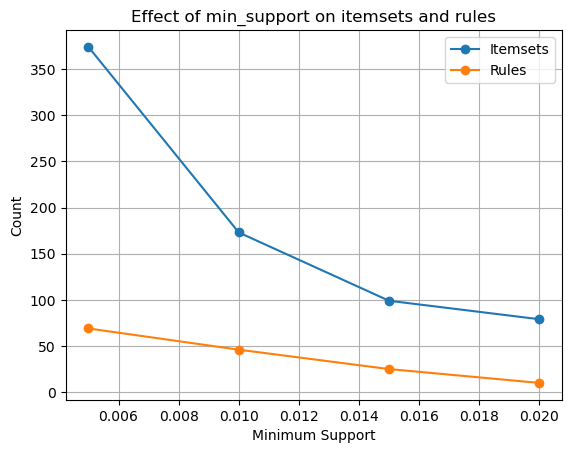

In [39]:
threshold_summary = explore_support_thresholds(df_deluxe_gourmet_products, [0.005, 0.01, 0.015, 0.02])

plt.plot(threshold_summary['support'], threshold_summary['n_itemsets'], marker='o', label='Itemsets')
plt.plot(threshold_summary['support'], threshold_summary['n_rules'], marker='o', label='Rules')
plt.xlabel('Minimum Support')
plt.ylabel('Count')
plt.title('Effect of min_support on itemsets and rules')
plt.legend()
plt.grid(True)
plt.show()



In [40]:
threshold_summary

,support,n_itemsets,n_rules
0,0.005,374,69
1,0.010,173,46
2,0.015,99,25
3,0.020,79,10


We explored various minimum support thresholds from 0.005 to 0.02. As shown in the plot, lower thresholds generate significantly more itemsets and rules, but also increase the risk of identifying patterns that are statistically weak or less relevant.

We selected a threshold of 0.01, which identifies 173 itemsets and 46 rules — a good balance between:

* Coverage (not missing interesting patterns)

* Interpretability (not too many patterns to analyse)

* Computational efficiency

Thresholds lower than 0.01 produce more patterns, but many of them may be weak or marginal. Thresholds higher than 0.015 reduce the number of results drastically and may miss useful associations.

Now, let's see what algorithm is faster (Apriori or FP-Growth), by comparing the computational time needed to run each one, using 0.01 as minimum support. 

In [41]:
from mlxtend.frequent_patterns import apriori, fpgrowth

import time

D={"Support": [0.01], 
   "Nº itemsets":[],
   "Max Length":[],
   "Time Apriori":[], 
   "Time FP-growth":[], 
  }

for min_supp in [0.01]:
    t1 = time.time()
    FI_apriori=apriori(df_deluxe_gourmet_products, min_supp)
    t2 = time.time()
    time_apriori = t2-t1
    D["Time Apriori"].append(time_apriori)

    num_itemsets = len(FI_apriori)

    D["Nº itemsets"].append(num_itemsets)

    FI_apriori['length'] = FI_apriori['itemsets'].apply(lambda x: len(x))
    max_length = max(FI_apriori['length'])

    D["Max Length"].append(max_length)
    
    t1 = time.time()
    FI_fpgrowth= fpgrowth(df_deluxe_gourmet_products, min_supp)
    t2 = time.time()
    time_fpg = t2-t1
    D["Time FP-growth"].append(time_fpg)
    
df_performance=pd.DataFrame(D)
df_performance

# We are printing
#Support	  Nº itemsets	Max Length	Time Apriori	Time FP-growth

,Support,Nº itemsets,Max Length,Time Apriori,Time FP-growth
0,0.01,173,2,1.014677,0.835764


As we can see from the table above, the FP-Growth algorithm runs faster than the Apriori one, so, from now on, we will be using FP-Growth.

Let's now compute the frequent patterns.

In [42]:
FP_deluxe = fpgrowth(df_deluxe_gourmet_products, min_support=0.01, use_colnames=True)
FP_deluxe = FP_deluxe.sort_values(by='support', ascending=False)
FP_deluxe.reset_index(drop=True, inplace=True) # reseting the index (not relevant for the analysis)

FP_deluxe.head(10)  # show the first 10 itemsets with support >= 0.01

,support,itemsets
0,0.290071,(Fresh Vegetables)
1,0.176282,(Fresh Fruit)
2,0.121340,(Soup)
3,0.119388,(Dried Fruit)
4,0.117980,(Cheese)
5,0.106173,(Cookies)
6,0.079165,(Paper Wipes)
7,0.077918,(Wine)
8,0.076126,(Canned Vegetables)
9,0.069470,(Frozen Vegetables)


As we can see from the results above, the itemsets with the highest support are all of length 1. While these indicate the most frequently purchased individual items, they are not particularly useful for our main goal, which is to generate association rules. For this, we are specifically interested in itemsets of length ≥ 2, as only those can reveal relationships between products.

Let's take a look at the number of different lengths there are and their main statistics.

In [43]:
FP_deluxe['length'] = FP_deluxe['itemsets'].apply(lambda x: len(x))

FP_deluxe.groupby('length')['support'].describe().round(4)

,count,mean,std,min,25%,50%,75%,max
length,,,,,,,,
1,102.0,0.0409,0.0377,0.0127,0.0141,0.0291,0.0533,0.2901
2,71.0,0.0162,0.0070,0.0105,0.0119,0.0145,0.0181,0.0518


From the table above, we observe that the itemsets are limited to lengths 1 and 2. Notably, the mean support of the length-1 itemsets is significantly higher than that of the length-2 itemsets. This indicates that individual products are much more prevalent in the dataset compared to product combinations. 

Finally, let's see the highest support values for length-2 itemsets.

In [44]:
FP_deluxe[FP_deluxe['length'] == 2].sort_values(by='support', ascending=False).head(10)  # show the first 10 itemsets with support >= 0.01 and length = 2

,support,itemsets,length
31,0.051806,"(Fresh Fruit, Fresh Vegetables)",2
50,0.036191,"(Soup, Fresh Vegetables)",2
51,0.035679,"(Fresh Vegetables, Dried Fruit)",2
53,0.031167,"(Fresh Vegetables, Cheese)",2
54,0.030015,"(Cookies, Fresh Vegetables)",2
72,0.023423,"(Fresh Vegetables, Paper Wipes)",2
73,0.022399,"(Fresh Fruit, Soup)",2
74,0.021919,"(Fresh Vegetables, Canned Vegetables)",2
75,0.021119,"(Fresh Fruit, Cheese)",2
76,0.021055,"(Nuts, Fresh Vegetables)",2


Looking at the table above, we can see that Fresh Vegetables appears in 8 out of the top 10 length-2 itemsets with the highest support. This highlights its strong co-occurrence with many different products, and suggests that it may play a central role in customer shopping behavior.
This observation gives us an early indication that Fresh Vegetables is likely to appear frequently in association rules.

Let's now try and use 0.02 as the minimum threshold for support, and compare the results.

In [45]:
FP_deluxe_02 = fpgrowth(df_deluxe_gourmet_products, min_support=0.02, use_colnames=True)
FP_deluxe_02['length'] = FP_deluxe_02['itemsets'].apply(lambda x: len(x))
FP_deluxe_02 = FP_deluxe_02.sort_values(by='support', ascending=False)
FP_deluxe_02.reset_index(drop=True, inplace=True) # reseting the index (not relevant for the analysis)

FP_deluxe_02.groupby('length')['support'].describe().round(4)

,count,mean,std,min,25%,50%,75%,max
length,,,,,,,,
1,67.0,0.0551,0.0398,0.026,0.0303,0.0420,0.0566,0.2901
2,12.0,0.0279,0.0096,0.020,0.0211,0.0229,0.0323,0.0518


As expected, increasing the support threshold to 0.02 led to a decrease in the number of frequent itemsets, from 173 to 79.

However, the average support of retained itemsets is higher, particularly for itemsets of length 1 (from 0.0409 to 0.0551) and length 2 (from 0.0162 to 0.0279).

This trade-off shows that a higher threshold captures only the most common and more confident patterns, whereas the lower threshold gives access to more diverse and specific combinations, including potentially niche or emerging co-purchases.

In [46]:
FP_deluxe_005 = fpgrowth(df_deluxe_gourmet_products, min_support=0.005, use_colnames=True)
FP_deluxe_005['length'] = FP_deluxe_005['itemsets'].apply(lambda x: len(x))
FP_deluxe_005 = FP_deluxe_005.sort_values(by='support', ascending=False)
FP_deluxe_005.reset_index(drop=True, inplace=True) # reseting the index (not relevant for the analysis)

FP_deluxe_005.groupby('length')['support'].describe().round(4)

,count,mean,std,min,25%,50%,75%,max
length,,,,,,,,
1,102.0,0.0409,0.0377,0.0127,0.0141,0.0291,0.0533,0.2901
2,268.0,0.0094,0.0056,0.0050,0.0060,0.0077,0.0108,0.0518
3,4.0,0.0061,0.0014,0.0050,0.0053,0.0057,0.0066,0.0081


Finally, by lowering the minimum support threshold to 0.005, we dramatically increased the number of length-2 itemsets (from 71 to 268) and began to detect some length-3 itemsets. This highlights how rare co-occurrence patterns that are not visible with stricter thresholds can emerge with more permissive values. However, this also comes with a trade-off:

* The average support of new patterns is lower, reflecting more sparse or occasional co-purchases.

* The presence of only 4 itemsets of length 3 (despite 268 of length 2) suggests that larger item combinations remain rare, even with looser constraints.

Choosing min_support = 0.01 offers a good compromise:

* It avoids the overly generic patterns captured by very high support (e.g., 0.02)

* But it also prevents the inclusion of many low-relevance patterns that appear with 0.005

* It captures a moderate number of meaningful itemsets, with acceptable support values

This threshold balances pattern richness with statistical reliability, making it a strong candidate for generating interpretable and useful association rules in this dataset.

#### 2.1.3. Generate Association Rules from Frequent Itemsets

A confidence threshold of 0.25 was chosen as a balanced starting point — it ensures that rules are strong enough to be meaningful, while not being overly restrictive. Higher thresholds (e.g., >0.5) would likely exclude many moderately strong but useful rules, whereas lower thresholds (e.g., <0.2) risk capturing too many weak or noisy associations.

In [47]:
from IPython.display import display

min_conf = 0.25 

rules_deluxe = association_rules(FP_deluxe, metric='confidence', min_threshold=min_conf).sort_values(by='lift', ascending=True, ignore_index=True)
print(f"Number of rules: {len(rules_deluxe)} rules")
display(rules_deluxe.head(10))
display(rules_deluxe.tail(10))
print("\n")

Number of rules: 46 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Lightbulbs),(Fresh Vegetables),0.056574,0.290071,0.014528,0.256787,0.885258,-0.001883,0.955217
1,(Wine),(Fresh Vegetables),0.077918,0.290071,0.020031,0.257084,0.886281,-0.002570,0.955599
2,(Waffles),(Fresh Vegetables),0.053310,0.290071,0.013952,0.261705,0.902210,-0.001512,0.961579
3,(Cheese),(Fresh Vegetables),0.117980,0.290071,0.031167,0.264171,0.910714,-0.003056,0.964803
4,(Plastic Utensils),(Fresh Vegetables),0.039967,0.290071,0.010624,0.265813,0.916372,-0.000970,0.966959
5,(Cereal),(Fresh Vegetables),0.054206,0.290071,0.014624,0.269776,0.930034,-0.001100,0.972207
6,(Jam),(Fresh Vegetables),0.040959,0.290071,0.011168,0.272656,0.939965,-0.000713,0.976057
7,(Ice Cream),(Fresh Vegetables),0.041183,0.290071,0.011296,0.274281,0.945567,-0.000650,0.978243
8,(Pasta),(Fresh Vegetables),0.048606,0.290071,0.013440,0.276498,0.953208,-0.000660,0.981240
9,(Frozen Chicken),(Fresh Vegetables),0.041247,0.290071,0.011424,0.276959,0.954798,-0.000541,0.981866


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(Dried Fruit),(Fresh Vegetables),0.119388,0.290071,0.035679,0.298847,1.030257,0.001048,1.012518
37,(Muffins),(Fresh Vegetables),0.056542,0.290071,0.017151,0.303339,1.045742,0.000750,1.019046
38,(Nuts),(Fresh Vegetables),0.068958,0.290071,0.021055,0.305336,1.052628,0.001053,1.021976
39,(Deli Meats),(Fresh Vegetables),0.052766,0.290071,0.016319,0.309278,1.066217,0.001014,1.027808
40,(Shampoo),(Fresh Vegetables),0.042143,0.290071,0.013216,0.313591,1.081086,0.000991,1.034266
41,(Jelly),(Fresh Vegetables),0.038591,0.290071,0.012128,0.314262,1.083398,0.000934,1.035278
42,(Personal Hygiene),(Fresh Vegetables),0.055678,0.290071,0.017503,0.314368,1.083763,0.001353,1.035438
43,(Donuts),(Fresh Vegetables),0.041823,0.290071,0.013248,0.316756,1.091996,0.001116,1.039057
44,(TV Dinner),(Fresh Vegetables),0.041215,0.290071,0.013056,0.316770,1.092045,0.001100,1.039078
45,(Hot Dogs),(Fresh Vegetables),0.041407,0.290071,0.013152,0.317620,1.094974,0.001141,1.040372


A notable pattern is that all rules point toward Fresh Vegetables, suggesting it is a frequently co-purchased core product in this store type.

While several rules exceed the confidence threshold, only a subset exhibit strong lift (> 1) and positive leverage, indicating meaningful positive associations.

We will now examine how many of these rules have Fresh Vegetables as the consequent, indicating its role as a frequent co-purchase target across different product combinations.

In [48]:
# Count how many rules have 'Fresh Vegetables' as the *only* consequent
rules_with_fv = rules_deluxe[rules_deluxe['consequents'].apply(lambda x: 'Fresh Vegetables' in x)]

# Show the number of such rules
print(f"Number of rules with 'Fresh Vegetables' as the consequent: {len(rules_with_fv)}")


Number of rules with 'Fresh Vegetables' as the consequent: 46


Really interesting... Out of the 46 association rules mined, Fresh Vegetables appears as the consequent in all of them. This indicates that Fresh Vegetables consistently co-occurs with a wide variety of other products, and acts as a hub item in Deluxe/Gourmet Supermarket transactions.

The presence of a single dominant consequent suggests that customers often purchase Fresh Vegetables alongside other items, but not necessarily the other way around — meaning Fresh Vegetables is frequently the target of associations, not the trigger.

This insight may have implications for product placement, cross-selling, and promotional strategies, where Fresh Vegetables could be leveraged as a core product around which other items are grouped or recommended.

Let's test using the minimum confidence as 0.3, in order to be more strict with the rules we find.

In [49]:
min_conf = 0.3 

rules_deluxe = association_rules(FP_deluxe, metric='confidence', min_threshold=min_conf).sort_values(by='lift', ascending=True, ignore_index=True)
print(f"Number of rules: {len(rules_deluxe)} rules")
display(rules_deluxe.head(10)) # As shown, we only have 9 rules with min_conf >= 0.3
print("\n")

Number of rules: 9 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Muffins),(Fresh Vegetables),0.056542,0.290071,0.017151,0.303339,1.045742,0.000750,1.019046
1,(Nuts),(Fresh Vegetables),0.068958,0.290071,0.021055,0.305336,1.052628,0.001053,1.021976
2,(Deli Meats),(Fresh Vegetables),0.052766,0.290071,0.016319,0.309278,1.066217,0.001014,1.027808
3,(Shampoo),(Fresh Vegetables),0.042143,0.290071,0.013216,0.313591,1.081086,0.000991,1.034266
4,(Jelly),(Fresh Vegetables),0.038591,0.290071,0.012128,0.314262,1.083398,0.000934,1.035278
5,(Personal Hygiene),(Fresh Vegetables),0.055678,0.290071,0.017503,0.314368,1.083763,0.001353,1.035438
6,(Donuts),(Fresh Vegetables),0.041823,0.290071,0.013248,0.316756,1.091996,0.001116,1.039057
7,(TV Dinner),(Fresh Vegetables),0.041215,0.290071,0.013056,0.316770,1.092045,0.001100,1.039078
8,(Hot Dogs),(Fresh Vegetables),0.041407,0.290071,0.013152,0.317620,1.094974,0.001141,1.040372


Raising the confidence threshold to 0.3 reduces the number of rules to just 9, but increases their reliability. These rules have:

* Higher confidence, indicating stronger conditional probability.

* Lift values all above 1, highlighting positive associations that occur more frequently than chance.

Consistent consequents: All rules point to Fresh Vegetables, confirming it as a hub item in Deluxe and Gourmet stores.

We chose a minimum confidence threshold of 0.25 to allow for a broader exploration of association rules. While a higher threshold such as 0.3 would ensure stronger rules, it drastically reduces the number of patterns discovered — from 46 to just 9 rules, in our case. By setting the threshold at 0.25, we strike a balance between rule strength and discovery, capturing associations that may be less frequent but still meaningful, particularly in the context of real-world purchasing behavior where not all relationships are strongly deterministic. This choice enables a richer analysis and supports more comprehensive pattern discovery, while still ensuring a reasonable level of rule confidence.

Now, let's generate association rules using lift as threshold.

In [50]:
lift_values = [1, 1.1, 1.2]
rules_per_lift = {}

for l in lift_values:
    rules_lift = association_rules(FP_deluxe, metric='lift', min_threshold=l).sort_values(by='lift', ascending=True, ignore_index=True)
    print(f"Number of rules with lift >= {l}: {len(rules_lift)} rules")
    display(rules_lift.head(10))
    display(rules_lift.tail(10))
    print("\n")

Number of rules with lift >= 1: 78 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fresh Vegetables),(Coffee),0.290071,0.052542,0.015264,0.052620,1.001478,0.000023,1.000082
1,(Coffee),(Fresh Vegetables),0.052542,0.290071,0.015264,0.290499,1.001478,0.000023,1.000604
2,(Fresh Vegetables),(Bologna),0.290071,0.040863,0.011872,0.040927,1.001565,0.000019,1.000067
3,(Bologna),(Fresh Vegetables),0.040863,0.290071,0.011872,0.290525,1.001565,0.000019,1.000640
4,(Fresh Fruit),(Chips),0.176282,0.064286,0.011360,0.064440,1.002397,0.000027,1.000165
5,(Chips),(Fresh Fruit),0.064286,0.176282,0.011360,0.176705,1.002397,0.000027,1.000513
6,(Fresh Vegetables),(Preserves),0.290071,0.067646,0.019711,0.067954,1.004551,0.000089,1.000330
7,(Preserves),(Fresh Vegetables),0.067646,0.290071,0.019711,0.291391,1.004551,0.000089,1.001863
8,(Fresh Fruit),(Fresh Vegetables),0.176282,0.290071,0.051806,0.293883,1.013142,0.000672,1.005399
9,(Fresh Vegetables),(Fresh Fruit),0.290071,0.176282,0.051806,0.178599,1.013142,0.000672,1.002820


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
68,(Fresh Fruit),(Sliced Bread),0.176282,0.056702,0.011552,0.065529,1.155672,0.001556,1.009446
69,(Sliced Bread),(Fresh Fruit),0.056702,0.176282,0.011552,0.203725,1.155672,0.001556,1.034463
70,(Fresh Fruit),(Juice),0.176282,0.053086,0.010816,0.061354,1.155744,0.001457,1.008808
71,(Juice),(Fresh Fruit),0.053086,0.176282,0.010816,0.203737,1.155744,0.001457,1.034480
72,(Fresh Fruit),(Batteries),0.176282,0.053726,0.011232,0.063714,1.185899,0.001761,1.010667
73,(Batteries),(Fresh Fruit),0.053726,0.176282,0.011232,0.209053,1.185899,0.001761,1.041432
74,(Pizza),(Fresh Fruit),0.054782,0.176282,0.011456,0.209112,1.186234,0.001798,1.041510
75,(Fresh Fruit),(Pizza),0.176282,0.054782,0.011456,0.064985,1.186234,0.001798,1.010911
76,(Soup),(Wine),0.121340,0.077918,0.011264,0.092827,1.191350,0.001809,1.016435
77,(Wine),(Soup),0.077918,0.121340,0.011264,0.144559,1.191350,0.001809,1.027142




Number of rules with lift >= 1.1: 14 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Soup),(Cheese),0.121340,0.117980,0.015839,0.130538,1.106439,0.001524,1.014443
1,(Cheese),(Soup),0.117980,0.121340,0.015839,0.134255,1.106439,0.001524,1.014918
2,(Fresh Fruit),(Paper Wipes),0.176282,0.079165,0.015552,0.088219,1.114366,0.001596,1.009930
3,(Paper Wipes),(Fresh Fruit),0.079165,0.176282,0.015552,0.196443,1.114366,0.001596,1.025089
4,(Fresh Fruit),(Sliced Bread),0.176282,0.056702,0.011552,0.065529,1.155672,0.001556,1.009446
5,(Sliced Bread),(Fresh Fruit),0.056702,0.176282,0.011552,0.203725,1.155672,0.001556,1.034463
6,(Fresh Fruit),(Juice),0.176282,0.053086,0.010816,0.061354,1.155744,0.001457,1.008808
7,(Juice),(Fresh Fruit),0.053086,0.176282,0.010816,0.203737,1.155744,0.001457,1.034480
8,(Fresh Fruit),(Batteries),0.176282,0.053726,0.011232,0.063714,1.185899,0.001761,1.010667
9,(Batteries),(Fresh Fruit),0.053726,0.176282,0.011232,0.209053,1.185899,0.001761,1.041432


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Fresh Fruit),(Sliced Bread),0.176282,0.056702,0.011552,0.065529,1.155672,0.001556,1.009446
5,(Sliced Bread),(Fresh Fruit),0.056702,0.176282,0.011552,0.203725,1.155672,0.001556,1.034463
6,(Fresh Fruit),(Juice),0.176282,0.053086,0.010816,0.061354,1.155744,0.001457,1.008808
7,(Juice),(Fresh Fruit),0.053086,0.176282,0.010816,0.203737,1.155744,0.001457,1.034480
8,(Fresh Fruit),(Batteries),0.176282,0.053726,0.011232,0.063714,1.185899,0.001761,1.010667
9,(Batteries),(Fresh Fruit),0.053726,0.176282,0.011232,0.209053,1.185899,0.001761,1.041432
10,(Pizza),(Fresh Fruit),0.054782,0.176282,0.011456,0.209112,1.186234,0.001798,1.041510
11,(Fresh Fruit),(Pizza),0.176282,0.054782,0.011456,0.064985,1.186234,0.001798,1.010911
12,(Soup),(Wine),0.121340,0.077918,0.011264,0.092827,1.191350,0.001809,1.016435
13,(Wine),(Soup),0.077918,0.121340,0.011264,0.144559,1.191350,0.001809,1.027142




Number of rules with lift >= 1.2: 0 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


To assess the strength of the association rules beyond confidence, we explored different lift thresholds: 1.0, 1.1, and 1.2. 

* A threshold of 1.2 yielded no rules, which suggests that such a strict requirement was too limiting for the dataset.

* At 1.1, only 14 rules were found.

* At 1.0, we retrieved 78 rules, offering a much broader view of item relationships while still ensuring that rules were better than random chance.

Thus, we selected lift ≥ 1.0 as a practical threshold to retain a good volume of rules while ensuring that the patterns reflect meaningful co-occurrence.

Now that we’ve evaluated confidence and lift independently, we compute association rules that satisfy both conditions simultaneously:

* Minimum confidence = 0.25, to ensure reliability.

* Minimum lift = 1.0, to ensure the association is statistically interesting.

This dual filtering isolates rules that are both strong and non-trivial, allowing us to focus on patterns that are more likely to be actionable in real-world settings.

In [51]:
rules_deluxe = association_rules(FP_deluxe, metric='confidence', min_threshold=0.25)

rules_deluxe_filtered = rules_deluxe[rules_deluxe['lift'] >= 1.0]

rules_deluxe_filtered.sort_values(by='lift', ascending=False, ignore_index=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hot Dogs),(Fresh Vegetables),0.041407,0.290071,0.013152,0.317620,1.094974,0.001141,1.040372
1,(TV Dinner),(Fresh Vegetables),0.041215,0.290071,0.013056,0.316770,1.092045,0.001100,1.039078
2,(Donuts),(Fresh Vegetables),0.041823,0.290071,0.013248,0.316756,1.091996,0.001116,1.039057
3,(Personal Hygiene),(Fresh Vegetables),0.055678,0.290071,0.017503,0.314368,1.083763,0.001353,1.035438
4,(Jelly),(Fresh Vegetables),0.038591,0.290071,0.012128,0.314262,1.083398,0.000934,1.035278
5,(Shampoo),(Fresh Vegetables),0.042143,0.290071,0.013216,0.313591,1.081086,0.000991,1.034266
6,(Deli Meats),(Fresh Vegetables),0.052766,0.290071,0.016319,0.309278,1.066217,0.001014,1.027808
7,(Nuts),(Fresh Vegetables),0.068958,0.290071,0.021055,0.305336,1.052628,0.001053,1.021976
8,(Muffins),(Fresh Vegetables),0.056542,0.290071,0.017151,0.303339,1.045742,0.000750,1.019046
9,(Dried Fruit),(Fresh Vegetables),0.119388,0.290071,0.035679,0.298847,1.030257,0.001048,1.012518


From the results above, we can see that using a minimum confidence threshold of 0.25 and a minimum lift of 1.0, we obtained a substantial number of association rules. These settings allowed us to balance the extraction of statistically relevant and informative patterns, without being too restrictive. Analyzing the top rules, we observe that Fresh Vegetables appear as the consequent in nearly all cases, reaffirming their role as a central hub item in the purchasing behavior of customers in Deluxe/Gourmet stores.

Also, looking at some of the patterns, there are some that are expected, such as {Hot Dogs} → {Fresh Vegetables} or {TV Dinner} → {Fresh Vegetables}, as well as some others that are not what we expect, such as {Personal Hygiene} → {Fresh Vegetables}. Moreover, the presence of rules involving less intuitively related items — like {Personal Hygiene} → {Fresh Vegetables} — highlights the potential of association rule mining to uncover non-obvious consumer behavior. These could point to behavioral or contextual patterns, such as shoppers making comprehensive purchases (e.g., combining grocery and hygiene items in a single trip), or store layout effects influencing purchase combinations. These latter patterns also suggest opportunities for cross-promotional strategies.

Another interesting point is the narrow range of lift values (only slightly above 1), suggesting that while the associations exist, they are not particularly strong. This could be due to the high prevalence of Fresh Vegetables overall, which reduces the strength of lift. Still, the consistency of this item across many rules reinforces its strategic importance.

In [52]:
display(rules_deluxe_filtered.sort_values(by='leverage', ascending=False))

display(rules_deluxe_filtered.sort_values(by='conviction', ascending=False))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(Personal Hygiene),(Fresh Vegetables),0.055678,0.290071,0.017503,0.314368,1.083763,0.001353,1.035438
33,(Hot Dogs),(Fresh Vegetables),0.041407,0.290071,0.013152,0.317620,1.094974,0.001141,1.040372
31,(Donuts),(Fresh Vegetables),0.041823,0.290071,0.013248,0.316756,1.091996,0.001116,1.039057
34,(TV Dinner),(Fresh Vegetables),0.041215,0.290071,0.013056,0.316770,1.092045,0.001100,1.039078
7,(Nuts),(Fresh Vegetables),0.068958,0.290071,0.021055,0.305336,1.052628,0.001053,1.021976
2,(Dried Fruit),(Fresh Vegetables),0.119388,0.290071,0.035679,0.298847,1.030257,0.001048,1.012518
18,(Deli Meats),(Fresh Vegetables),0.052766,0.290071,0.016319,0.309278,1.066217,0.001014,1.027808
1,(Soup),(Fresh Vegetables),0.121340,0.290071,0.036191,0.298259,1.028230,0.000994,1.011669
32,(Shampoo),(Fresh Vegetables),0.042143,0.290071,0.013216,0.313591,1.081086,0.000991,1.034266
37,(Jelly),(Fresh Vegetables),0.038591,0.290071,0.012128,0.314262,1.083398,0.000934,1.035278


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(Hot Dogs),(Fresh Vegetables),0.041407,0.290071,0.013152,0.317620,1.094974,0.001141,1.040372
34,(TV Dinner),(Fresh Vegetables),0.041215,0.290071,0.013056,0.316770,1.092045,0.001100,1.039078
31,(Donuts),(Fresh Vegetables),0.041823,0.290071,0.013248,0.316756,1.091996,0.001116,1.039057
15,(Personal Hygiene),(Fresh Vegetables),0.055678,0.290071,0.017503,0.314368,1.083763,0.001353,1.035438
37,(Jelly),(Fresh Vegetables),0.038591,0.290071,0.012128,0.314262,1.083398,0.000934,1.035278
32,(Shampoo),(Fresh Vegetables),0.042143,0.290071,0.013216,0.313591,1.081086,0.000991,1.034266
18,(Deli Meats),(Fresh Vegetables),0.052766,0.290071,0.016319,0.309278,1.066217,0.001014,1.027808
7,(Nuts),(Fresh Vegetables),0.068958,0.290071,0.021055,0.305336,1.052628,0.001053,1.021976
16,(Muffins),(Fresh Vegetables),0.056542,0.290071,0.017151,0.303339,1.045742,0.000750,1.019046
2,(Dried Fruit),(Fresh Vegetables),0.119388,0.290071,0.035679,0.298847,1.030257,0.001048,1.012518


In addition to confidence and lift, we examined the rules using leverage and conviction to further assess their statistical and practical significance.

Although leverage values are low (as expected due to small support differences), they are all positive, signaling real, albeit weak, co-occurrence.
Conviction values further support this, with higher conviction observed in rules like {TV Dinner} → {Fresh Vegetables} and {Hot Dogs} → {Fresh Vegetables}.

These rules, though not extremely strong, are consistent, diverse, and actionable. The moderate thresholds ensured a wide range of associations were discovered, which is useful for exploratory analysis.

#### 2.1.4.  Take a look at Maximal Patterns

To maintain consistency with the previously mined frequent itemsets using FP-Growth, we applied the same min_support threshold of 0.01 when running FP-Max. This ensures that all patterns considered frequent in both methods occur in at least 1% of the transactions. However, unlike FP-Growth, FP-Max returns only maximal frequent itemsets, i.e., itemsets that are not subsets of any larger frequent itemsets. This is particularly useful when the goal is to compress results or mine strong co-purchase groups without listing all lower-order subsets.

In [53]:
maximal_deluxe_gourmet = fpmax(df_deluxe_gourmet_products, min_support=0.01, use_colnames=True).sort_values(by='support', ascending=False)
maximal_deluxe_gourmet['length'] = maximal_deluxe_gourmet['itemsets'].apply(lambda x: len(x))
maximal_deluxe_gourmet = maximal_deluxe_gourmet.sort_values(by='length', ascending=False)

display(maximal_deluxe_gourmet.head(10))

print(f"Number of frequent patterns per length:")
print(FP_deluxe.value_counts('length').sort_index())
print(f"Number of maximal patterns per length:")
print(maximal_deluxe_gourmet.value_counts('length').sort_index())



,support,itemsets,length
125,0.051806,"(Fresh Fruit, Fresh Vegetables)",2
112,0.012320,"(Soup, Cookies)",2
104,0.012448,"(Fresh Fruit, Canned Vegetables)",2
68,0.012512,"(Fresh Vegetables, Peanut Butter)",2
100,0.012736,"(Fresh Fruit, Nuts)",2
113,0.012960,"(Cookies, Dried Fruit)",2
63,0.013056,"(TV Dinner, Fresh Vegetables)",2
66,0.013152,"(Hot Dogs, Fresh Vegetables)",2
69,0.013216,"(Fresh Vegetables, Shampoo)",2
67,0.013248,"(Fresh Vegetables, Donuts)",2


Number of frequent patterns per length:
length
1    102
2     71
Name: count, dtype: int64
Number of maximal patterns per length:
length
1    55
2    71
Name: count, dtype: int64


In [54]:
print(f"Frequent itemsets found: {len(FP_deluxe)}")
print(f"Maximal itemsets found: {len(maximal_deluxe_gourmet)}")

Frequent itemsets found: 173
Maximal itemsets found: 126


We computed maximal frequent itemsets using the same support threshold as the frequent patterns (min_support = 0.01) to ensure a fair and consistent comparison.

Interestingly, both frequent and maximal itemsets show identical numbers of patterns of length 2, but the maximal set excludes almost half of the 1-itemsets. This is expected, since FP-Max only retains the longest frequent itemsets that are not subsets of any other, effectively filtering out simpler patterns.

This indicates that, under the chosen threshold, no frequent itemsets longer than length 2 exist. As a result, all 2-itemsets are also maximal, and the advantage of FP-Max lies mostly in reducing redundancy in 1-itemsets. This compactness can be advantageous when we prioritize performance or interpretability over exhaustive pattern coverage.

While maximal itemsets are more concise and remove redundant patterns, they also reduce the number of possible association rules, particularly those involving more interpretable or standalone items. This trade-off must be considered carefully depending on the analysis goal: conciseness and efficiency vs. completeness and flexibility.

In [55]:
rules_maximal = association_rules(maximal_deluxe_gourmet, metric='support', min_threshold=0.005, support_only=True)
print(f"Number of association rules from maximal patterns: {len(rules_maximal)}")
rules_maximal.sort_values(by='lift', ascending=False).head()

Number of association rules from maximal patterns: 142


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fresh Fruit),(Fresh Vegetables),NaN,NaN,0.051806,NaN,NaN,NaN,NaN
1,(Fresh Vegetables),(Fresh Fruit),NaN,NaN,0.051806,NaN,NaN,NaN,NaN
2,(Soup),(Cookies),NaN,NaN,0.012320,NaN,NaN,NaN,NaN
3,(Cookies),(Soup),NaN,NaN,0.012320,NaN,NaN,NaN,NaN
4,(Fresh Fruit),(Canned Vegetables),NaN,NaN,0.012448,NaN,NaN,NaN,NaN


When applying association_rules() to the maximal itemsets, we encountered a KeyError. This happens because maximal itemsets only include the largest frequent combinations, and do not contain the subsets required to compute antecedent and consequent support for rules.

As a result, we were only able to extract the support of the full itemsets, without computing rule quality metrics such as confidence, lift, leverage, or conviction. While this restricts the depth of the analysis, it reinforces the idea that maximal itemsets are not designed for generating detailed rules but for summarizing the most significant frequent structures.

#### 2.1.5.  Deluxe/Gourmet Supermarkets versus All Stores (Global versus Deluxe/Gourmet Supermarkets Specific Patterns and Rules)

Discuss the similarities and diferences between the results obtained in task 1. (frequent itemsets and association rules found in transactions from all stores) and those obtained above (frequent itemsets and association rules found in transactions only from Deluxe/Gourmet Supermarkets).


When comparing the Deluxe/Gourmet supermarkets with all stores, we can find some similarities and some differences.

In regards to the frequent itemsets, the highest support 1-itemsets are generally the same, with Fresh Vegetables being the highest support singular item by far in both cases. Even so, there was a further increase in the support value of this itemset: from 28.4% in all stores to 29% in the Deluxe/Gourmet stores. The rest of the top 10 is largely the same as well. The top 5 highest support 2-itemsets are also the same, with very slight variations in the support values.

Moving on to association rules, when we use confidence as the metric, we see that, no matter what support value itemsets we use, we see that the highest confidence rules are always the ones that have Fresh Vegetables as the consequent. While the rules with different antecedents change in order from all stores to Deluxe/Gourmet (ex. Shampoo -> Fresh Vegetables is the highest confidence rule in all stores, while its Hot Dogs -> Fresh Vegetables in Deluxe/Gourmet), the general overview of the rules is quite similar. Using 0.01 minimum support and 0.25 minimum confidence, we saw a slight decrease in the number of rules, from 48 to 46. However, we have more strong rules in the Deluxe/Gourmet stores, as seen from the fact the number of 0.3 minimum confidence rules jumps from 4 to 9. These rules have lift values above 1 on both store groups, so we can consider that we saw in increase in interesting rules.
When using lift as the metric, despite an increase in the number of rules (70 to 78 with lift higher than 1.0 and 10 to 14 with lift higher than 1.1), the rules look to be mostly the same- with some differences in the order- particularly the top 2 of Soup -> Wine and Wine -> Soup. 

### 2.2. Analyse Small Groceries

Here you should analyse **Small Groceries (STORE_ID = 2, 5, 14, 22)**.

#### 2.2.1.  Load/Preprocess the Dataset


First, let's filter out only the stores we want to use (i.e., Small Groceries).

In [56]:
# Deluxe store columns
small_store_cols = ['2','5','14', '22']

# Select rows where ANY deluxe store column is True
small_stores_mask = df_allstores[small_store_cols].any(axis=1)

# Apply mask to select only Deluxe transactions
df_small = df_allstores[small_stores_mask]

# Check
df_small.head()

,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,3,4,5,6,7,8,9,Acetominifen,Anchovies,Aspirin,Auto Magazines,Bagels,Batteries,Beer,Bologna,Candles,Canned Fruit,Canned Vegetables,Cereal,Cheese,Chips,Chocolate,Chocolate Candy,Clams,Cleaners,Coffee,Cold Remedies,Computer Magazines,Conditioner,Cookies,Cooking Oil,Cottage Cheese,Crackers,Deli Meats,Deli Salads,Deodorizers,Dips,Donuts,Dried Fruit,Dried Meat,Eggs,Fashion Magazines,Flavored Drinks,French Fries,Fresh Chicken,Fresh Fish,Fresh Fruit,Fresh Vegetables,Frozen Chicken,Frozen Vegetables,Gum,Hamburger,Hard Candy,Home Magazines,Hot Dogs,Ibuprofen,Ice Cream,Jam,Jelly,Juice,Lightbulbs,Maps,Milk,Mouthwash,Muffins,Nasal Sprays,Nuts,Oysters,Pancake Mix,Pancakes,Paper Dishes,Paper Wipes,Pasta,Peanut Butter,Personal Hygiene,Pizza,Plastic Utensils,Popcorn,Popsicles,Pot Cleaners,Pot Scrubbers,Pots and Pans,Preserves,Pretzels,Rice,Sardines,Sauces,Screwdrivers,Shampoo,Shellfish,Shrimp,Sliced Bread,Soda,Soup,Sour Cream,Spices,Sponges,Sports Magazines,Sugar,Sunglasses,TV Dinner,Tofu,Toilet Brushes,Tools,Toothbrushes,Tuna,Waffles,Wine,Yogurt
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

Once again, let's see if this was done correctly.

In [57]:
# Check if any transaction still has a 'True' in non-Deluxe store columns
non_small_stores = list(set([str(i) for i in range(1, 25)]) - set(small_store_cols))

# Check if any transaction in deluxe subset has a True in non-deluxe store columns
error_check = df_small[non_small_stores].any(axis=1)

# Show how many 'wrong' transactions there are
print(f"Transactions with wrong store: {error_check.sum()}")


Transactions with wrong store: 0


As we can see from the result above, it was, indeed, done correctly.

Now, since we only have the stores that are considered to be Small, we can get rid of the STORE_ID columns.

In [58]:
store_cols = [str(i) for i in range(1, 25)]

df_small = df_small.drop(columns=store_cols)

df_small.head()

,Acetominifen,Anchovies,Aspirin,Auto Magazines,Bagels,Batteries,Beer,Bologna,Candles,Canned Fruit,Canned Vegetables,Cereal,Cheese,Chips,Chocolate,Chocolate Candy,Clams,Cleaners,Coffee,Cold Remedies,Computer Magazines,Conditioner,Cookies,Cooking Oil,Cottage Cheese,Crackers,Deli Meats,Deli Salads,Deodorizers,Dips,Donuts,Dried Fruit,Dried Meat,Eggs,Fashion Magazines,Flavored Drinks,French Fries,Fresh Chicken,Fresh Fish,Fresh Fruit,Fresh Vegetables,Frozen Chicken,Frozen Vegetables,Gum,Hamburger,Hard Candy,Home Magazines,Hot Dogs,Ibuprofen,Ice Cream,Jam,Jelly,Juice,Lightbulbs,Maps,Milk,Mouthwash,Muffins,Nasal Sprays,Nuts,Oysters,Pancake Mix,Pancakes,Paper Dishes,Paper Wipes,Pasta,Peanut Butter,Personal Hygiene,Pizza,Plastic Utensils,Popcorn,Popsicles,Pot Cleaners,Pot Scrubbers,Pots and Pans,Preserves,Pretzels,Rice,Sardines,Sauces,Screwdrivers,Shampoo,Shellfish,Shrimp,Sliced Bread,Soda,Soup,Sour Cream,Spices,Sponges,Sports Magazines,Sugar,Sunglasses,TV Dinner,Tofu,Toilet Brushes,Tools,Toothbrushes,Tuna,Waffles,Wine,Yogurt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Fal

In [59]:
print(f"Number of transactions in small stores: {df_small.shape[0]}")

Number of transactions in small stores: 2278


In [60]:
print(f"Percentage of transactions in small stores: {df_small.shape[0]/num_transactions*100:.2f}%")

Percentage of transactions in small stores: 3.28%


From the results above we can see that, in contrast with the previous analysis (Deluxe/Gourmet Stores), we have a much less significant number of transactions that were done in Small Stores.

From the result above, we can see that, in contrast to the previous analysis of Deluxe and Gourmet Stores, Small Stores account for only 3.28% of all transactions. This indicates that Small Stores represent a much less significant portion of the overall activity in the dataset, and may have less reliable pattern support due to lower transaction volume.

As a result, when mining patterns or association rules for Small Stores, we may need to use a lower minimum support threshold in order to capture more patterns/association rules.


#### 2.2.2. Compute Frequent Itemsets

As mentioned earlier, the Small Stores dataset contains significantly fewer transactions than the Deluxe/Gourmet dataset.
To account for this, we lowered the minimum support threshold (0.005) in order to capture a broader range of relevant patterns — not just the most predominant ones.
This adjustment ensures that we don’t exclude meaningful itemsets that are frequent relative to the size of this smaller dataset, even if their absolute frequency is low compared to the full dataset.

Since our dataset is significantly smaller, let's check what algorithm (Apriori or FP-Growth) runs faster:

In [61]:
min_support = 0.005  # Adjust based on earlier decision

# APRIORI timing
start_ap = time.time()
frequent_ap = apriori(df_small, min_support=min_support, use_colnames=True)
end_ap = time.time()
apriori_time = end_ap - start_ap

# FP-GROWTH timing
start_fp = time.time()
frequent_fp = fpgrowth(df_small, min_support=min_support, use_colnames=True)
end_fp = time.time()
fpgrowth_time = end_fp - start_fp

print(f"Apriori runtime: {apriori_time:.4f} seconds")
print(f"FP-Growth runtime: {fpgrowth_time:.4f} seconds")

Apriori runtime: 0.1887 seconds
FP-Growth runtime: 0.3524 seconds


Once again, the results confirm that FP-Growth outperforms Apriori in terms of runtime, even on a relatively small dataset.
Specifically, FP-Growth took approximately one-third of the time required by the Apriori algorithm to execute, highlighting its superior efficiency for frequent pattern mining.

Now, let's mine the Frequent Patterns using 0.005 as the minimum support (explained above).

In [62]:
FP_small = fpgrowth(df_small, min_support=0.005, use_colnames=True).sort_values(by='support', ascending=False, ignore_index=True)

FP_small.head()

,support,itemsets
0,0.277875,(Fresh Vegetables)
1,0.176910,(Fresh Fruit)
2,0.119842,(Soup)
3,0.118525,(Cheese)
4,0.107550,(Dried Fruit)


As shown in the table above, Fresh Vegetables once again emerge as the most frequently purchased item, with a support of approximately 27.8%, meaning they appear in, approximately, 1 out of every 4 transactions in this dataset.
This reinforces previous findings from other store types and confirms that Fresh Vegetables are a central product across different store formats. Their consistently high support suggests they are a core component of customers' baskets, likely due to their general-purpose use and high consumption frequency.

Although single-item patterns are useful for identifying the most frequently purchased products, our goal is to discover associations between products.
Therefore, we now focus on itemsets of length greater than 1, which are the basis for mining meaningful association rules.

In [63]:
FP_small['length'] = FP_small['itemsets'].apply(lambda x: len(x))

FP_small['length'].value_counts().sort_index()

length
1    102
2    299
3      5
Name: count, dtype: int64

From the result above, we can see that most of the frequent patterns are 2-itemsets.

In [64]:
FP_small.sort_values(by='length', ascending=False, ignore_index=True).head(10)

,support,itemsets,length
0,0.006146,"(Fresh Vegetables, Dried Fruit, Cheese)",3
1,0.006585,"(Fresh Fruit, Fresh Vegetables, Dried Fruit)",3
2,0.007024,"(Fresh Fruit, Fresh Vegetables, Paper Wipes)",3
3,0.005268,"(Chocolate Candy, Fresh Vegetables, Paper Wipes)",3
4,0.006585,"(Fresh Fruit, Cookies, Fresh Vegetables)",3
5,0.008341,"(Nuts, Cookies)",2
6,0.006585,"(Dips, Cookies)",2
7,0.006585,"(Fresh Fruit, French Fries)",2
8,0.006585,"(Fresh Fruit, Spices)",2
9,0.006585,"(Batteries, Dried Fruit)",2


As we can already observe from the table above, higher-length itemsets tend to have lower support values, which is expected.
Larger item combinations occur less frequently in transactions, since it's rarer for customers to purchase multiple specific items together, especially in smaller-format stores.
This pattern aligns with typical shopping behavior and reinforces the need to use lower support thresholds when exploring longer itemsets.

Now, let's look at them individually.

In [65]:
print(f"Top 10 Frequent 1-itemsets")
FP_small[FP_small['length'] == 1].sort_values(by='support', ascending=False).head(10)

Top 10 Frequent 1-itemsets


,support,itemsets,length
0,0.277875,(Fresh Vegetables),1
1,0.176910,(Fresh Fruit),1
2,0.119842,(Soup),1
3,0.118525,(Cheese),1
4,0.107550,(Dried Fruit),1
5,0.107112,(Cookies),1
6,0.088674,(Wine),1
7,0.082090,(Canned Vegetables),1
8,0.078139,(Paper Wipes),1
9,0.071554,(Chocolate Candy),1


In [66]:
print(f"Top 10 Frequent 2-itemsets")
FP_small[FP_small['length'] == 2].sort_values(by='support', ascending=False).head(10)

Top 10 Frequent 2-itemsets


,support,itemsets,length
36,0.044776,"(Fresh Fruit, Fresh Vegetables)",2
51,0.033363,"(Fresh Vegetables, Dried Fruit)",2
50,0.033363,"(Fresh Vegetables, Cheese)",2
55,0.030729,"(Soup, Fresh Vegetables)",2
67,0.024583,"(Cookies, Fresh Vegetables)",2
70,0.023705,"(Fresh Vegetables, Canned Vegetables)",2
71,0.023705,"(Fresh Fruit, Dried Fruit)",2
73,0.022827,"(Chocolate Candy, Fresh Vegetables)",2
74,0.022388,"(Fresh Vegetables, Paper Wipes)",2
76,0.021510,"(Fresh Fruit, Paper Wipes)",2


In [67]:
print(f"Frequent 3-itemsets")
FP_small[FP_small['length'] == 3].sort_values(by='support', ascending=False).head(10)

Frequent 3-itemsets


,support,itemsets,length
249,0.007024,"(Fresh Fruit, Fresh Vegetables, Paper Wipes)",3
276,0.006585,"(Fresh Fruit, Fresh Vegetables, Dried Fruit)",3
286,0.006585,"(Fresh Fruit, Cookies, Fresh Vegetables)",3
302,0.006146,"(Fresh Vegetables, Dried Fruit, Cheese)",3
387,0.005268,"(Chocolate Candy, Fresh Vegetables, Paper Wipes)",3


In [68]:
FP_small.groupby('length')['support'].describe().round(4)

,count,mean,std,min,25%,50%,75%,max
length,,,,,,,,
1,102.0,0.0403,0.0372,0.0079,0.0140,0.0318,0.0522,0.2779
2,299.0,0.0090,0.0052,0.0053,0.0057,0.0070,0.0101,0.0448
3,5.0,0.0063,0.0007,0.0053,0.0061,0.0066,0.0066,0.0070


The summary statistics above reinforce the observation that support values tend to decrease as itemset length increases.

This trend reflects a common characteristic of market basket data: longer item combinations occur less frequently, as they require more specific co-occurrence between products.

These results justify the need to use lower support thresholds when analyzing larger itemsets and highlight that most meaningful patterns in this dataset are between pairs of products.

Finally, let's use the minimum support that was used for the larger dataset, regarding Deluxe/Gourmet Stores, and compare it to the previous results.

In [69]:
FP_small_01 = FP_small[FP_small['support'] >= 0.01].sort_values(by='support', ascending=False, ignore_index=True) # We can use the previous FP_small dataframe, and filtering the support >= 0.01.

print(FP_small_01.groupby('length')['support'].describe().round(4))
print("\n")
print(f"Frequent itemsets found with min_support = 0.005: {len(FP_small)}")
print(f"Frequent itemsets found with min_support = 0.01: {len(FP_small_01)}")

        count    mean     std     min     25%     50%     75%     max
length                                                               
1        98.0  0.0416  0.0373  0.0101  0.0150  0.0336  0.0526  0.2779
2        77.0  0.0158  0.0063  0.0101  0.0114  0.0136  0.0180  0.0448


Frequent itemsets found with min_support = 0.005: 406
Frequent itemsets found with min_support = 0.01: 175


From the results above, we can see that increasing the minimum support threshold from 0.005 to 0.01 significantly reduces the number of frequent patterns, from 406 to 175.
This reduction is expected, as a higher support threshold filters out itemsets that occur less frequently — particularly those involving less common products or combinations.

Additionally, we observe that at this higher support level, only itemsets of length 1 and 2 remain frequent, and even those appear in smaller quantities due to the stricter threshold. No 3-itemsets survive the threshold, indicating that larger item combinations are either rare or too inconsistent in the Small Stores dataset.

This further supports the idea that most co-purchases in this context involve only pairs of items, and that using lower support thresholds is necessary to capture richer or more specific patterns in smaller datasets.

#### 2.2.3. Generate Association Rules from Frequent Itemsets

In the Deluxe/Gourmet dataset, we previously used a confidence threshold of 0.25.
For consistency with our prior approach — and considering that we have already lowered the minimum support threshold — we will also apply a confidence threshold of 0.25.
Later, we will experiment with different confidence threshold values to evaluate whether this allows us to uncover a broader and more diverse set of rules, and compare the results accordingly.

In [70]:
min_conf = 0.25 

rules = association_rules(FP_small, metric='confidence', min_threshold=min_conf).sort_values(by='lift', ascending=True, ignore_index=True)
print(f"Number of rules: {len(rules)} rules")
display(rules.head(10))
display(rules.tail(10))
print("\n")

Number of rules: 67 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fresh Fruit),(Fresh Vegetables),0.176910,0.277875,0.044776,0.253102,0.910846,-0.004383,0.966831
1,(Soup),(Fresh Vegetables),0.119842,0.277875,0.030729,0.256410,0.922753,-0.002572,0.971133
2,(Dips),(Fresh Vegetables),0.056190,0.277875,0.014486,0.257812,0.927799,-0.001127,0.972968
3,(Peanut Butter),(Fresh Vegetables),0.046532,0.277875,0.012291,0.264151,0.950610,-0.000639,0.981349
4,(Sports Magazines),(Fresh Vegetables),0.019754,0.277875,0.005268,0.266667,0.959663,-0.000221,0.984715
5,(Chips),(Fresh Vegetables),0.065408,0.277875,0.017559,0.268456,0.966104,-0.000616,0.987125
6,(Pasta),(Fresh Vegetables),0.047410,0.277875,0.012730,0.268519,0.966327,-0.000444,0.987208
7,(Crackers),(Fresh Vegetables),0.029412,0.277875,0.007902,0.268657,0.966825,-0.000271,0.987395
8,(Popcorn),(Fresh Vegetables),0.045654,0.277875,0.012291,0.269231,0.968891,-0.000395,0.988171
9,(Frozen Vegetables),(Fresh Vegetables),0.066725,0.277875,0.017998,0.269737,0.970712,-0.000543,0.988855


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
57,(Hamburger),(Fresh Vegetables),0.028095,0.277875,0.010536,0.375000,1.349526,0.002729,1.155399
58,(Ice Cream),(Fresh Vegetables),0.042142,0.277875,0.015803,0.375000,1.349526,0.004093,1.155399
59,(Sponges),(Fresh Vegetables),0.015803,0.277875,0.006146,0.388889,1.399509,0.001754,1.181659
60,(Beer),(Fresh Fruit),0.022388,0.176910,0.005707,0.254902,1.440860,0.001746,1.104674
61,"(Cookies, Fresh Vegetables)",(Fresh Fruit),0.024583,0.176910,0.006585,0.267857,1.514091,0.002236,1.124221
62,(Peanut Butter),(Fresh Fruit),0.046532,0.176910,0.012730,0.273585,1.546468,0.004499,1.133086
63,(Paper Wipes),(Fresh Fruit),0.078139,0.176910,0.021510,0.275281,1.556054,0.007687,1.135737
64,(Ibuprofen),(Fresh Vegetables),0.013608,0.277875,0.006585,0.483871,1.741324,0.002803,1.399117
65,"(Fresh Vegetables, Paper Wipes)",(Fresh Fruit),0.022388,0.176910,0.007024,0.313725,1.773366,0.003063,1.199360
66,"(Chocolate Candy, Paper Wipes)",(Fresh Vegetables),0.009219,0.277875,0.005268,0.571429,2.056421,0.002706,1.684958


As shown in the table above, using a minimum confidence threshold of 0.25 results in a substantial number of association rules in the Small Stores dataset.
We chose to present the rules sorted by lift in ascending order, to observe how strongly each rule deviates from independence.

Notably, many of the rules involve Fresh Vegetables as the consequent, consistent with its role as a frequently purchased product. However, we also observe that the lift values are generally below 1, suggesting that these associations are not particularly strong — that is, the presence of the antecedent does not significantly increase the likelihood of purchasing Fresh Vegetables.

Now, let's test it using the minimum confidence threshold as 0.3, in order to be more strict with the rules we find.

In [71]:
min_conf = 0.3 

rules = association_rules(FP_small, metric='confidence', min_threshold=min_conf).sort_values(by='lift', ascending=True, ignore_index=True)
print(f"Number of rules: {len(rules)} rules")
display(rules.head(10))
display(rules.tail(10))
print("\n")

Number of rules: 33 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cold Remedies),(Fresh Vegetables),0.028973,0.277875,0.008780,0.303030,1.090526,0.000729,1.036092
1,(Aspirin),(Fresh Vegetables),0.024583,0.277875,0.007463,0.303571,1.092473,0.000632,1.036897
2,(Plastic Utensils),(Fresh Vegetables),0.035996,0.277875,0.010975,0.304878,1.097176,0.000972,1.038846
3,(Jelly),(Fresh Vegetables),0.035996,0.277875,0.010975,0.304878,1.097176,0.000972,1.038846
4,"(Fresh Fruit, Cookies)",(Fresh Vegetables),0.021510,0.277875,0.006585,0.306122,1.101654,0.000608,1.040709
5,(Oysters),(Fresh Vegetables),0.017120,0.277875,0.005268,0.307692,1.107303,0.000510,1.043069
6,(Preserves),(Fresh Vegetables),0.064091,0.277875,0.019754,0.308219,1.109200,0.001945,1.043863
7,(Frozen Chicken),(Fresh Vegetables),0.042581,0.277875,0.013169,0.309278,1.113011,0.001337,1.045464
8,(Dried Fruit),(Fresh Vegetables),0.107550,0.277875,0.033363,0.310204,1.116343,0.003477,1.046867
9,(Waffles),(Fresh Vegetables),0.053117,0.277875,0.016681,0.314050,1.130182,0.001921,1.052736


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,(Beer),(Fresh Vegetables),0.022388,0.277875,0.007463,0.333333,1.199579,0.001242,1.083187
24,(TV Dinner),(Fresh Vegetables),0.044337,0.277875,0.015364,0.346535,1.247087,0.003044,1.105070
25,(Personal Hygiene),(Fresh Vegetables),0.052239,0.277875,0.018437,0.352941,1.270142,0.003921,1.116011
26,(Acetominifen),(Fresh Vegetables),0.015364,0.277875,0.005707,0.371429,1.336673,0.001437,1.148835
27,(Hamburger),(Fresh Vegetables),0.028095,0.277875,0.010536,0.375000,1.349526,0.002729,1.155399
28,(Ice Cream),(Fresh Vegetables),0.042142,0.277875,0.015803,0.375000,1.349526,0.004093,1.155399
29,(Sponges),(Fresh Vegetables),0.015803,0.277875,0.006146,0.388889,1.399509,0.001754,1.181659
30,(Ibuprofen),(Fresh Vegetables),0.013608,0.277875,0.006585,0.483871,1.741324,0.002803,1.399117
31,"(Fresh Vegetables, Paper Wipes)",(Fresh Fruit),0.022388,0.176910,0.007024,0.313725,1.773366,0.003063,1.199360
32,"(Chocolate Candy, Paper Wipes)",(Fresh Vegetables),0.009219,0.277875,0.005268,0.571429,2.056421,0.002706,1.684958


After raising the minimum confidence threshold to 0.3, we filtered the rule set to retain only stronger associations.

In the top rules (bottom of the table), we observe very high lift values:

* Example: {Chocolate Candy, Paper Wipes} → {Fresh Vegetables} has a lift of 2.05, meaning this combination more than doubles the likelihood of Fresh Vegetables being purchased.

* {Sponges} → {Fresh Vegetables} has a lift of 1.74, indicating a strong co-purchase pattern.

In contrast, rules at the lower end of the lift spectrum (top of the table) still meet the confidence threshold but have lift closer to 1, meaning they are not particularly surprising or informative, although more informative than the ones obtained with 0.25 as the confidence threshold.

Based on this, we will proceed with a confidence threshold of 0.3.
This value strikes a good balance between rule strength and quantity: it yields a manageable number of association rules while maintaining reasonable confidence in the discovered relationships.
Moreover, as seen in the table above, applying this threshold allows us to identify rules with high lift values, suggesting that many of these associations are not only frequent but also statistically interesting and potentially useful.

Now, let's generate association rules using lift as the threshold.

In [72]:
lift_values = [1.1, 1.2, 1.3]
rules_per_lift = {}

for l in lift_values:
    rules = association_rules(FP_small, metric='lift', min_threshold=l).sort_values(by='lift', ascending=True, ignore_index=True)
    print(f"Number of rules with lift >= {l}: {len(rules)} rules")
    display(rules.head(10))
    display(rules.tail(10))
    print("\n")



Number of rules with lift >= 1.1: 322 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fresh Fruit),(French Fries),0.176910,0.033802,0.006585,0.037221,1.101157,0.000605,1.003551
1,(French Fries),(Fresh Fruit),0.033802,0.176910,0.006585,0.194805,1.101157,0.000605,1.022225
2,"(Fresh Fruit, Cookies)",(Fresh Vegetables),0.021510,0.277875,0.006585,0.306122,1.101654,0.000608,1.040709
3,(Fresh Vegetables),"(Fresh Fruit, Cookies)",0.277875,0.021510,0.006585,0.023697,1.101654,0.000608,1.002240
4,(Cookies),(Frozen Vegetables),0.107112,0.066725,0.007902,0.073770,1.105587,0.000755,1.007606
5,(Frozen Vegetables),(Cookies),0.066725,0.107112,0.007902,0.118421,1.105587,0.000755,1.012829
6,(Oysters),(Fresh Vegetables),0.017120,0.277875,0.005268,0.307692,1.107303,0.000510,1.043069
7,(Fresh Vegetables),(Oysters),0.277875,0.017120,0.005268,0.018957,1.107303,0.000510,1.001873
8,(Nuts),(Canned Vegetables),0.067603,0.082090,0.006146,0.090909,1.107438,0.000596,1.009701
9,(Canned Vegetables),(Nuts),0.082090,0.067603,0.006146,0.074866,1.107438,0.000596,1.007851


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
312,(Chocolate Candy),(French Fries),0.071554,0.033802,0.005268,0.073620,2.177994,0.002849,1.042982
313,(French Fries),(Chocolate Candy),0.033802,0.071554,0.005268,0.155844,2.177994,0.002849,1.099851
314,(Canned Vegetables),(Cold Remedies),0.082090,0.028973,0.005268,0.064171,2.214876,0.002889,1.037612
315,(Cold Remedies),(Canned Vegetables),0.028973,0.082090,0.005268,0.181818,2.214876,0.002889,1.121891
316,(Pizza),(Ice Cream),0.052239,0.042142,0.005268,0.100840,2.392857,0.003066,1.065281
317,(Ice Cream),(Pizza),0.042142,0.052239,0.005268,0.125000,2.392857,0.003066,1.083156
318,(Paper Wipes),"(Chocolate Candy, Fresh Vegetables)",0.078139,0.022827,0.005268,0.067416,2.953328,0.003484,1.047812
319,"(Chocolate Candy, Fresh Vegetables)",(Paper Wipes),0.022827,0.078139,0.005268,0.230769,2.953328,0.003484,1.198420
320,"(Fresh Vegetables, Paper Wipes)",(Chocolate Candy),0.022388,0.071554,0.005268,0.235294,3.288344,0.003666,1.214122
321,(Chocolate Candy),"(Fresh Vegetables, Paper Wipes)",0.071554,0.022388,0.005268,0.073620,3.288344,0.003666,1.055303




Number of rules with lift >= 1.2: 218 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dried Fruit),(Preserves),0.107550,0.064091,0.008341,0.077551,1.210008,0.001448,1.014591
1,(Preserves),(Dried Fruit),0.064091,0.107550,0.008341,0.130137,1.210008,0.001448,1.025966
2,(Eggs),(Dried Fruit),0.063213,0.107550,0.008341,0.131944,1.226814,0.001542,1.028102
3,(Dried Fruit),(Eggs),0.107550,0.063213,0.008341,0.077551,1.226814,0.001542,1.015543
4,(Jam),(Wine),0.048288,0.088674,0.005268,0.109091,1.230243,0.000986,1.022917
5,(Wine),(Jam),0.088674,0.048288,0.005268,0.059406,1.230243,0.000986,1.011820
6,(Paper Wipes),(Canned Vegetables),0.078139,0.082090,0.007902,0.101124,1.231869,0.001487,1.021175
7,(Canned Vegetables),(Paper Wipes),0.082090,0.078139,0.007902,0.096257,1.231869,0.001487,1.020048
8,(Dips),(Wine),0.056190,0.088674,0.006146,0.109375,1.233447,0.001163,1.023243
9,(Wine),(Dips),0.088674,0.056190,0.006146,0.069307,1.233447,0.001163,1.014094


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
208,(French Fries),(Chocolate Candy),0.033802,0.071554,0.005268,0.155844,2.177994,0.002849,1.099851
209,(Chocolate Candy),(French Fries),0.071554,0.033802,0.005268,0.073620,2.177994,0.002849,1.042982
210,(Canned Vegetables),(Cold Remedies),0.082090,0.028973,0.005268,0.064171,2.214876,0.002889,1.037612
211,(Cold Remedies),(Canned Vegetables),0.028973,0.082090,0.005268,0.181818,2.214876,0.002889,1.121891
212,(Pizza),(Ice Cream),0.052239,0.042142,0.005268,0.100840,2.392857,0.003066,1.065281
213,(Ice Cream),(Pizza),0.042142,0.052239,0.005268,0.125000,2.392857,0.003066,1.083156
214,(Paper Wipes),"(Chocolate Candy, Fresh Vegetables)",0.078139,0.022827,0.005268,0.067416,2.953328,0.003484,1.047812
215,"(Chocolate Candy, Fresh Vegetables)",(Paper Wipes),0.022827,0.078139,0.005268,0.230769,2.953328,0.003484,1.198420
216,"(Fresh Vegetables, Paper Wipes)",(Chocolate Candy),0.022388,0.071554,0.005268,0.235294,3.288344,0.003666,1.214122
217,(Chocolate Candy),"(Fresh Vegetables, Paper Wipes)",0.071554,0.022388,0.005268,0.073620,3.288344,0.003666,1.055303




Number of rules with lift >= 1.3: 170 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(French Fries),(Soup),0.033802,0.119842,0.005268,0.155844,1.300414,0.001217,1.042649
1,(Soup),(French Fries),0.119842,0.033802,0.005268,0.043956,1.300414,0.001217,1.010621
2,(Paper Wipes),(Dried Fruit),0.078139,0.107550,0.010975,0.140449,1.305893,0.002571,1.038275
3,(Dried Fruit),(Paper Wipes),0.107550,0.078139,0.010975,0.102041,1.305893,0.002571,1.026618
4,(Waffles),(Canned Vegetables),0.053117,0.082090,0.005707,0.107438,1.308790,0.001346,1.028400
5,(Canned Vegetables),(Waffles),0.082090,0.053117,0.005707,0.069519,1.308790,0.001346,1.017627
6,(Cheese),(Shampoo),0.118525,0.033802,0.005268,0.044444,1.314863,0.001261,1.011138
7,(Shampoo),(Cheese),0.033802,0.118525,0.005268,0.155844,1.314863,0.001261,1.044209
8,(Wine),(Cooking Oil),0.088674,0.048727,0.005707,0.064356,1.320756,0.001386,1.016705
9,(Cooking Oil),(Wine),0.048727,0.088674,0.005707,0.117117,1.320756,0.001386,1.032216


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
160,(French Fries),(Chocolate Candy),0.033802,0.071554,0.005268,0.155844,2.177994,0.002849,1.099851
161,(Chocolate Candy),(French Fries),0.071554,0.033802,0.005268,0.073620,2.177994,0.002849,1.042982
162,(Canned Vegetables),(Cold Remedies),0.082090,0.028973,0.005268,0.064171,2.214876,0.002889,1.037612
163,(Cold Remedies),(Canned Vegetables),0.028973,0.082090,0.005268,0.181818,2.214876,0.002889,1.121891
164,(Ice Cream),(Pizza),0.042142,0.052239,0.005268,0.125000,2.392857,0.003066,1.083156
165,(Pizza),(Ice Cream),0.052239,0.042142,0.005268,0.100840,2.392857,0.003066,1.065281
166,(Paper Wipes),"(Chocolate Candy, Fresh Vegetables)",0.078139,0.022827,0.005268,0.067416,2.953328,0.003484,1.047812
167,"(Chocolate Candy, Fresh Vegetables)",(Paper Wipes),0.022827,0.078139,0.005268,0.230769,2.953328,0.003484,1.198420
168,(Chocolate Candy),"(Fresh Vegetables, Paper Wipes)",0.071554,0.022388,0.005268,0.073620,3.288344,0.003666,1.055303
169,"(Fresh Vegetables, Paper Wipes)",(Chocolate Candy),0.022388,0.071554,0.005268,0.235294,3.288344,0.003666,1.214122


We evaluated three different lift thresholds (1.1, 1.2, and 1.3) to examine how the number and quality of association rules change with increasing levels of statistical interest.

* Lift ≥ 1.1 produced 322 rules, but many had lift values only slightly above 1, suggesting weak or marginal associations.

* Lift ≥ 1.3, while ensuring stronger rules, reduced the set to just 170 rules, which may exclude moderately interesting patterns still worth considering.

* Lift ≥ 1.2 emerged as a good compromise: it retained 218 rules — a manageable number — while focusing on non-trivial relationships that are meaningfully stronger than chance.

Therefore, we selected lift ≥ 1.2 as the final threshold, balancing rule strength and interpretability for the Small Stores dataset.

Now that we’ve evaluated confidence and lift independently, we compute association rules that satisfy both conditions simultaneously:

Minimum confidence = 0.3, to ensure reliability

Minimum lift = 1.2, to ensure the association is statistically interesting

This dual filtering isolates rules that are both strong and non-trivial, allowing us to focus on patterns that are more likely to be actionable in real-world settings.

In [73]:
rules = association_rules(FP_small, metric='confidence', min_threshold=0.3)

rules_filtered = rules[rules['lift'] >= 1.2]

rules_filtered.sort_values(by='lift', ascending=False, ignore_index=True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Chocolate Candy, Paper Wipes)",(Fresh Vegetables),0.009219,0.277875,0.005268,0.571429,2.056421,0.002706,1.684958
1,"(Fresh Vegetables, Paper Wipes)",(Fresh Fruit),0.022388,0.176910,0.007024,0.313725,1.773366,0.003063,1.199360
2,(Ibuprofen),(Fresh Vegetables),0.013608,0.277875,0.006585,0.483871,1.741324,0.002803,1.399117
3,(Sponges),(Fresh Vegetables),0.015803,0.277875,0.006146,0.388889,1.399509,0.001754,1.181659
4,(Ice Cream),(Fresh Vegetables),0.042142,0.277875,0.015803,0.375000,1.349526,0.004093,1.155399
5,(Hamburger),(Fresh Vegetables),0.028095,0.277875,0.010536,0.375000,1.349526,0.002729,1.155399
6,(Acetominifen),(Fresh Vegetables),0.015364,0.277875,0.005707,0.371429,1.336673,0.001437,1.148835
7,(Personal Hygiene),(Fresh Vegetables),0.052239,0.277875,0.018437,0.352941,1.270142,0.003921,1.116011
8,(TV Dinner),(Fresh Vegetables),0.044337,0.277875,0.015364,0.346535,1.247087,0.003044,1.105070


By applying both a minimum confidence threshold of 0.3 and a minimum lift of 1.2, we isolated a subset of association rules that are both reliable and interesting.
The resulting rules highlight meaningful co-purchase patterns, such as:

* {Chocolate Candy, Paper Wipes} → {Fresh Vegetables}
Confidence: 57.1%, Lift: 2.05
→ Customers who buy this specific combination are over twice as likely to also buy Fresh Vegetables.

* {Ice Cream} → {Fresh Vegetables}
Confidence: 37.5%, Lift: 1.35
→ Suggests a weak but notable complementary trend.

These rules are strong candidates for cross-selling strategies, product bundling suggestions, or even in-store placement decisions.

In [74]:
display(rules_filtered.sort_values(by='leverage', ascending=False))

display(rules_filtered.sort_values(by='conviction', ascending=False))


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Ice Cream),(Fresh Vegetables),0.042142,0.277875,0.015803,0.375000,1.349526,0.004093,1.155399
6,(Personal Hygiene),(Fresh Vegetables),0.052239,0.277875,0.018437,0.352941,1.270142,0.003921,1.116011
24,"(Fresh Vegetables, Paper Wipes)",(Fresh Fruit),0.022388,0.176910,0.007024,0.313725,1.773366,0.003063,1.199360
12,(TV Dinner),(Fresh Vegetables),0.044337,0.277875,0.015364,0.346535,1.247087,0.003044,1.105070
26,(Ibuprofen),(Fresh Vegetables),0.013608,0.277875,0.006585,0.483871,1.741324,0.002803,1.399117
18,(Hamburger),(Fresh Vegetables),0.028095,0.277875,0.010536,0.375000,1.349526,0.002729,1.155399
32,"(Chocolate Candy, Paper Wipes)",(Fresh Vegetables),0.009219,0.277875,0.005268,0.571429,2.056421,0.002706,1.684958
28,(Sponges),(Fresh Vegetables),0.015803,0.277875,0.006146,0.388889,1.399509,0.001754,1.181659
30,(Acetominifen),(Fresh Vegetables),0.015364,0.277875,0.005707,0.371429,1.336673,0.001437,1.148835


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(Chocolate Candy, Paper Wipes)",(Fresh Vegetables),0.009219,0.277875,0.005268,0.571429,2.056421,0.002706,1.684958
26,(Ibuprofen),(Fresh Vegetables),0.013608,0.277875,0.006585,0.483871,1.741324,0.002803,1.399117
24,"(Fresh Vegetables, Paper Wipes)",(Fresh Fruit),0.022388,0.176910,0.007024,0.313725,1.773366,0.003063,1.199360
28,(Sponges),(Fresh Vegetables),0.015803,0.277875,0.006146,0.388889,1.399509,0.001754,1.181659
10,(Ice Cream),(Fresh Vegetables),0.042142,0.277875,0.015803,0.375000,1.349526,0.004093,1.155399
18,(Hamburger),(Fresh Vegetables),0.028095,0.277875,0.010536,0.375000,1.349526,0.002729,1.155399
30,(Acetominifen),(Fresh Vegetables),0.015364,0.277875,0.005707,0.371429,1.336673,0.001437,1.148835
6,(Personal Hygiene),(Fresh Vegetables),0.052239,0.277875,0.018437,0.352941,1.270142,0.003921,1.116011
12,(TV Dinner),(Fresh Vegetables),0.044337,0.277875,0.015364,0.346535,1.247087,0.003044,1.105070


In addition to confidence and lift, we examined the rules using leverage and conviction to further assess their statistical and practical significance.

Leverage highlights rules that occur more frequently than expected by chance. Although the absolute values are small (as is typical in market basket data), all leverage values are positive, indicating statistically relevant co-occurrences that may reflect habitual purchase behavior.

Conviction captures the directional strength of implication — it reflects how unlikely the consequent is to occur without the antecedent. The top rules in this set show notably high conviction, suggesting a strong dependency between items, going beyond what would be expected under independence.

Overall, the association rules discovered are statistically sound and practically meaningful, especially after filtering by confidence (≥ 0.3) and lift (≥ 1.2), and further validating with leverage and conviction.

From a business perspective, several rules stand out as potentially actionable. For example, rules involving combinations like {Chocolate Candy, Paper Wipes} → {Fresh Vegetables} or {Ice Cream} → {Fresh Vegetables} suggest non-obvious co-purchase patterns that could inform product placement, cross-selling strategies, or targeted promotions.

In conclusion, the rules are not only good in terms of standard metrics, but also interesting and useful from a practical standpoint, especially in the context of small store environments where uncovering reliable patterns is more challenging due to limited transaction volume.

#### 2.2.4. Take a Look at Maximal Patterns

Maximal frequent itemsets are itemsets that are frequent and not a subset of any other frequent itemset.
Compared to regular frequent itemsets, they offer a more compact and memory-efficient representation of the data:

* While FP-Growth produces all frequent combinations, many of them are subsets of larger itemsets.

* FP-Max captures only the most specific frequent itemsets, reducing redundancy.

This is particularly useful when the goal is to compress results or mine strong co-purchase groups without listing all lower-order subsets.

Let's take a look at them.

In [75]:
min_support = 0.005  # using the same as for FP-Growth for fair comparison
maximal_small = fpmax(df_small, min_support=min_support, use_colnames=True)
maximal_small['length'] = maximal_small['itemsets'].apply(len)
maximal_small = maximal_small.sort_values(by='length', ascending=False, ignore_index=True)

print(maximal_small.value_counts('length').sort_index())

display(maximal_small.head(10))

length
1     30
2    288
3      5
Name: count, dtype: int64


,support,itemsets,length
0,0.005268,"(Chocolate Candy, Fresh Vegetables, Paper Wipes)",3
1,0.006585,"(Fresh Fruit, Fresh Vegetables, Dried Fruit)",3
2,0.006146,"(Fresh Vegetables, Dried Fruit, Cheese)",3
3,0.006585,"(Fresh Fruit, Cookies, Fresh Vegetables)",3
4,0.007024,"(Fresh Fruit, Fresh Vegetables, Paper Wipes)",3
5,0.006585,"(Personal Hygiene, Cookies)",2
6,0.006585,"(Cookies, Muffins)",2
7,0.005707,"(Lightbulbs, Muffins)",2
8,0.005268,"(Muffins, Wine)",2
9,0.018437,"(Fresh Vegetables, Deli Meats)",2


In [76]:
print(f"Frequent itemsets found (FP-Growth): {len(FP_small)}")
print(f"Maximal itemsets found (FP-Max): {len(maximal_small)}")

Frequent itemsets found (FP-Growth): 406
Maximal itemsets found (FP-Max): 323


We computed maximal frequent itemsets using the same minimum support threshold (min_support = 0.005) as for FP-Growth to enable a fair comparison.

The majority of the maximal itemsets are of length 2, and only a small number reach length 3. This is consistent with what we saw in the full frequent itemset mining, where longer combinations were much rarer due to the smaller dataset size.

The reduced number of patterns shows that FP-Max is effective at eliminating redundant subsets, while still preserving the longest significant patterns. This makes it useful in applications where storage efficiency and summarized insights are more important than completeness.

Although maximal patterns are more compact, they generate fewer association rules compared to all frequent itemsets, because the smaller subset patterns are not preserved.
This trade-off is acceptable when we want to focus on strong, longer itemsets, but it may miss simpler or more interpretable rules involving smaller item combinations. Let's see if this is indeed true.

In [77]:
rules_maximal = association_rules(maximal_small, metric='support', min_threshold=0.005, support_only=True)
print(f"Number of association rules from maximal patterns: {len(rules_maximal)}")
rules_maximal.sort_values(by='lift', ascending=False).head()


Number of association rules from maximal patterns: 606


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Chocolate Candy, Fresh Vegetables)",(Paper Wipes),NaN,NaN,0.005268,NaN,NaN,NaN,NaN
1,"(Chocolate Candy, Paper Wipes)",(Fresh Vegetables),NaN,NaN,0.005268,NaN,NaN,NaN,NaN
2,"(Fresh Vegetables, Paper Wipes)",(Chocolate Candy),NaN,NaN,0.005268,NaN,NaN,NaN,NaN
3,(Chocolate Candy),"(Fresh Vegetables, Paper Wipes)",NaN,NaN,0.005268,NaN,NaN,NaN,NaN
4,(Fresh Vegetables),"(Chocolate Candy, Paper Wipes)",NaN,NaN,0.005268,NaN,NaN,NaN,NaN


When applying association_rules() to the maximal itemsets, we encountered a KeyError. This happens because maximal itemsets only include the largest frequent combinations, and do not contain the subsets required to compute antecedent and consequent support for rules.

As a result, it's not possible to calculate metrics like confidence or lift from maximal itemsets directly. While this limits the types of rules we can extract, it reflects the fact that maximal patterns are optimized for concise pattern representation, not rule generation.

#### 2.2.5. Small Groceries versus All Stores (Global versus Small Groceries Specific Patterns and Rules)

Discuss the similarities and diferences between the results obtained in task 1. (frequent itemsets and association rules found in transactions from all stores) and those obtained above (frequent itemsets and association rules found in transactions only Small Groceries).

Comparing small groceries with all stores, we can see that we decided to go for a lower minimum support value (0.01 to 0.005) as we have a smaller subset of the dataset with small groceries. Even still, the FP-Growth algorithm still came out on top as the best one to use. 

Speaking in terms of frequent patterns, the prevalence of Fresh Vegetables as the dominant item in this dataset is still true when considering just the small groceries, with a slightly lower support of approximately 27.8%, confirming that this item is a central product no matter what subset of the data we consider. In regards to longer itemsets, our 2-itemsets are again quite similar, with some re-ordering and slightly lower support scores. However, in small groceries we do have some 3-itemsets, which we didn't get when we considered all stores. This is due to the fact we lowered the minimum support, and the 3-itemsets found have very low support values which mean these combinations occur less frequently. When we increased the support to 0.01 as we did with the other sections, we only found 1 and 2-itemsets. 

Next, in terms of association rules, with confidence as the metric and 0.25 as the minimum value, we saw an increase in rules from 48 to 67. Further, we saw rules with higher confidence (ex. 0.57) and some higher values of lift. This is likely due to the fact we are considering a smaller subset and using a lower value of minimum support. However, the prevalence of Fresh Vegetables as a consequent does maintain. With confidence at a minimum of 0.3 we once again see a big increase from 4 to 33 rules, for the same reasons as stated previously.

Overall, this subset yielded some more significant rules, for example {Chocolate Candy, Paper Wipes} -> Fresh Vegetables, which is likely due to the same reasons as stated before.

### 2.3.  Deluxe/Gourmet Supermarkets versus Small Groceries

Discuss the similarities and diferences between the results obtained in task 2.1. (frequent itemsets and association rules found in transactions only from Deluxe/Gourmet Supermarkets) and those obtained in task 2.2. (frequent itemsets and association rules found in transactions only Small Groceries).

Regarding the Frequent Itemsets that were discovered:

* **Volume of Data**: The Deluxe/Gourmet dataset contained significantly more transactions (~31,000), which allowed for higher support thresholds (e.g., 0.01) while still producing rich itemset structures. The Small Groceries dataset, being much smaller, required a lower support threshold (0.005) to uncover meaningful patterns.

* **Itemset Length**: In both datasets, the majority of frequent patterns were of length 2. However, the Small Groceries dataset still retained a few 3-itemsets under the lower support threshold, while in Deluxe/Gourmet they were rare unless the threshold was reduced substantially.

* **Most Frequent Items**: In both datasets, Fresh Vegetables consistently appeared as the most frequent item and also formed part of most frequent itemsets. This suggests it is an essential item commonly bought, regardless of store type.

Regarding the Association Rules that were mined:

* **Confidence and Lift**: Association rules in both datasets showed similar behavior: confidence values were often above 0.25 and lift values slightly above 1. 

* **Rule Interpretability**:

    * In Small Groceries, rules like {Chocolate Candy, Paper Wipes} → {Fresh Vegetables} or {Ibuprofen}	→ {Fresh Vegetables} emerged, pointing to less obvious co-purchases and possibly household necessity patterns.

    * In Deluxe/Gourmet, rules such as {Hot Dogs} → {Fresh Vegetables} or {TV Dinner} → {Fresh Vegetables} were more aligned with ready-meal or prepared food combinations, fitting a more convenience-driven consumption behavior.

* **Metric Evaluation**: In both contexts, the most interesting rules according to leverage and conviction (mostly) overlapped with those with high support and confidence, reinforcing the quality of these insights. Yet, the leverage and lift values were slightly higher in Small Groceries, likely due to fewer transactions inflating the weight of coincidences.



So, to conclude, while both store types reveal Fresh Vegetables as a central item, the nature of co-occurrences and rule composition differs subtly, reflecting distinct shopping behaviors: necessity-based combinations in Small Groceries vs. more meal-oriented groupings in Deluxe/Gourmet, which is to be expected. The size of the dataset strongly influenced the choice of thresholds and the richness of extracted patterns, underlining the need to adapt parameters to context and data scale.